# EDA

This eda is more of a set of facts from the dataset. Information gathered in this EDA found no use in model training process. Keep it as a fun fact.
Some cells may not work due to changes in data extraction methods over time.


In [28]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..' ))
sys.path.append(project_root)

print(project_root)

/Users/gsk/documents/projects/Lie-Detector/classificators_and_data


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import machine_learning.files_lib as FL
import data_manipulation.utils as DP
import machine_learning.preprocessing_lib as PL

In [30]:
file_paths = DP.get_file_paths("../data")
len(file_paths)

60

In [31]:
file_paths_dict = DP.organize_files_by_id(file_paths)
file_paths_dict['4C0F44CF']

['../data/4C0F44CF/EEG_ExperimentBlock.DECEITFUL_RESPONSE_TO_FAKE_IDENTITY_raw.fif',
 '../data/4C0F44CF/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif',
 '../data/4C0F44CF/EEG_ExperimentBlock.DECEITFUL_RESPONSE_TO_TRUE_IDENTITY_raw.fif',
 '../data/4C0F44CF/EEG_ExperimentBlock.HONEST_RESPONSE_TO_FAKE_IDENTITY_raw.fif']

In [32]:
dir_paths = FL.get_all_dir_paths("../../data")
dir_paths

[]

In [33]:
# for block_path in dir_paths:
#     preprocessed_data, all_events_durations = preprocess_eeg_data(block_path, l_freq=1, h_freq=50, notch_filter=[50, 100])
#     epochs_dict, padded_array_epochs, labels, epoches_durations = process_variable_time_epochs(preprocessed_data, baseline=(None, None), constant_values=0)

In [34]:
# preprocessed_eeg_data, all_events_durations, epochs_dict, padded_array_epochs, labels, epoches_durations

In [35]:
data = []
    
from pathlib import Path



df = PL.create_dataframe(Path("../data"))

Opening raw data file ../data/1299BF1A/EEG_ExperimentBlock.DECEITFUL_RESPONSE_TO_FAKE_IDENTITY_raw.fif...
    Range : 0 ... 70649 =      0.000 ...   282.596 secs
Ready.
Reading 0 ... 70649  =      0.000 ...   282.596 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwi

In [36]:
df.head()

,participant,block,events_count,incorrect_answers_count,timeout_count,dropped_epochs,epochs
0,1299BF1A,DECEITFUL_RESPONSE_TO_FAKE_IDENTITY,214,0,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b..."
1,1299BF1A,HONEST_RESPONSE_TO_TRUE_IDENTITY,214,0,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b..."
2,1299BF1A,DECEITFUL_RESPONSE_TO_TRUE_IDENTITY,214,0,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b..."
3,1299BF1A,HONEST_RESPONSE_TO_FAKE_IDENTITY,214,0,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b..."
4,DAF24E45,DECEITFUL_RESPONSE_TO_FAKE_IDENTITY,214,2,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b..."


In [37]:
# df = pd.DataFrame.from_dict(data)

# df.head()

In [38]:
df[df["events_count"] != 214 + 2 * df["timeout_count"]] 

,participant,block,events_count,incorrect_answers_count,timeout_count,dropped_epochs,epochs


In [39]:
df[["participant", "incorrect_answers_count"]].groupby(["participant"]).sum().sort_values(["incorrect_answers_count"]) 

,incorrect_answers_count
participant,
1299BF1A,0
ASD6DSA7,2
A59D58F4,3
BNFH348D,3
E52DEA2D,3
FF0DC21C,4
02F6BC66,6
2D663E30,6
DAF24E45,7


In [40]:
block_sequence = ["HONEST_RESPONSE_TO_TRUE_IDENTITY", "DECEITFUL_RESPONSE_TO_TRUE_IDENTITY", "HONEST_RESPONSE_TO_FAKE_IDENTITY", "DECEITFUL_RESPONSE_TO_FAKE_IDENTITY"]

block_sorter = lambda k: k if k.name == "participant" else k.apply(lambda x: block_sequence.index(x))


In [41]:

df[["block", "incorrect_answers_count"]].groupby(["block"]).sum().sort_values(["block"], key=block_sorter)

,incorrect_answers_count
block,
HONEST_RESPONSE_TO_TRUE_IDENTITY,26
DECEITFUL_RESPONSE_TO_TRUE_IDENTITY,25
HONEST_RESPONSE_TO_FAKE_IDENTITY,7
DECEITFUL_RESPONSE_TO_FAKE_IDENTITY,45


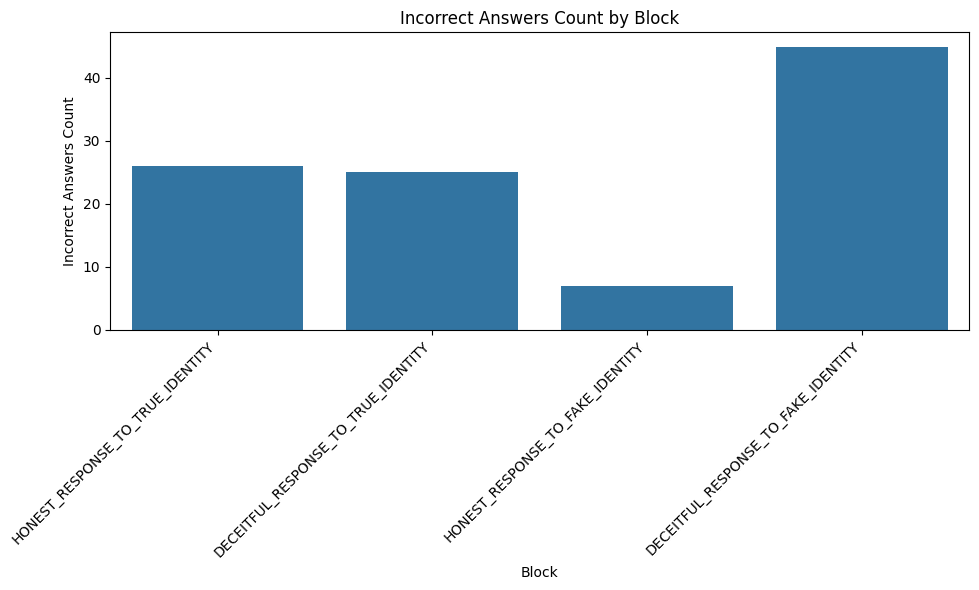

In [42]:
# DO PAPIERKA

df_grouped = df[["block", "incorrect_answers_count"]].groupby(["block"]).sum().sort_values(["block"], key=block_sorter)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped.index, y=df_grouped["incorrect_answers_count"])
plt.title('Incorrect Answers Count by Block')
plt.xlabel('Block')
plt.ylabel('Incorrect Answers Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
questionnaires = pd.read_csv("participant_info.csv")

questionnaires

,UUID,Sex,Age,comments
0,02F6BC66,M,22,NaN
1,1299BF1A,K,23,NaN
2,2D663E30,M,22,NaN
3,4C0F44CF,M,25,NaN
4,827366EC,M,22,NaN
5,8DB745E3,K,19,NaN
6,A3627947,K,22,NaN
7,A59D58F4,K,26,NaN
8,ASD6DSA7,K,21,NaN
9,ASD793JD,K,22,broken


In [46]:
questionnaires[["Sex"]].value_counts() 

Sex
K      9
M      7
Name: count, dtype: int64

In [49]:
eeg_df = df.merge(questionnaires.rename(columns={"UUID": "participant", "Płeć": "sex", "Wiek": "age"}), on=["participant"])

eeg_df.head()

,participant,block,events_count,incorrect_answers_count,timeout_count,dropped_epochs,epochs,Sex,Age,comments
0,1299BF1A,DECEITFUL_RESPONSE_TO_FAKE_IDENTITY,214,0,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b...",K,23,NaN
1,1299BF1A,HONEST_RESPONSE_TO_TRUE_IDENTITY,214,0,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b...",K,23,NaN
2,1299BF1A,DECEITFUL_RESPONSE_TO_TRUE_IDENTITY,214,0,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b...",K,23,NaN
3,1299BF1A,HONEST_RESPONSE_TO_FAKE_IDENTITY,214,0,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b...",K,23,NaN
4,DAF24E45,DECEITFUL_RESPONSE_TO_FAKE_IDENTITY,214,2,0,"[214, 215]","<Epochs | 214 events (all good), -0.2 – 2 s (b...",M,26,NaN


In [50]:
def calculate_response_times(epochs):
    events = epochs.events
    event_times = epochs.times * 1000  # Convert to milliseconds
    response_times = []

    for i in range(1, len(events)):  # Start from 1 to avoid index error on first iteration
        # Calculate response time between consecutive events
        event_time_current = events[i, 0]
        event_time_previous = events[i - 1, 0]
        
        # Ensure the indices are within bounds
        if event_time_current < len(event_times) and event_time_previous < len(event_times):
            response_time = event_times[event_time_current] - event_times[event_time_previous]
            response_times.append(response_time)

    return response_times

# Add response times to the DataFrame
eeg_df['response_times'] = eeg_df.apply(lambda row: calculate_response_times(row['epochs']), axis=1)

# Flatten the list of response times for analysis
eeg_df = eeg_df.explode('response_times').reset_index(drop=True)

# Display the updated DataFrame
print(eeg_df.head())


  participant                                block  events_count  \
0    1299BF1A  DECEITFUL_RESPONSE_TO_FAKE_IDENTITY           214   
1    1299BF1A     HONEST_RESPONSE_TO_TRUE_IDENTITY           214   
2    1299BF1A  DECEITFUL_RESPONSE_TO_TRUE_IDENTITY           214   
3    1299BF1A     HONEST_RESPONSE_TO_FAKE_IDENTITY           214   
4    DAF24E45  DECEITFUL_RESPONSE_TO_FAKE_IDENTITY           214   

   incorrect_answers_count  timeout_count dropped_epochs  \
0                        0              0     [214, 215]   
1                        0              0     [214, 215]   
2                        0              0     [214, 215]   
3                        0              0     [214, 215]   
4                        2              0     [214, 215]   

                                              epochs Sex  Age comments  \
0  <Epochs | 214 events (all good), -0.2 – 2 s (b...   K   23      NaN   
1  <Epochs | 214 events (all good), -0.2 – 2 s (b...   K   23      NaN   
2  <Epoc

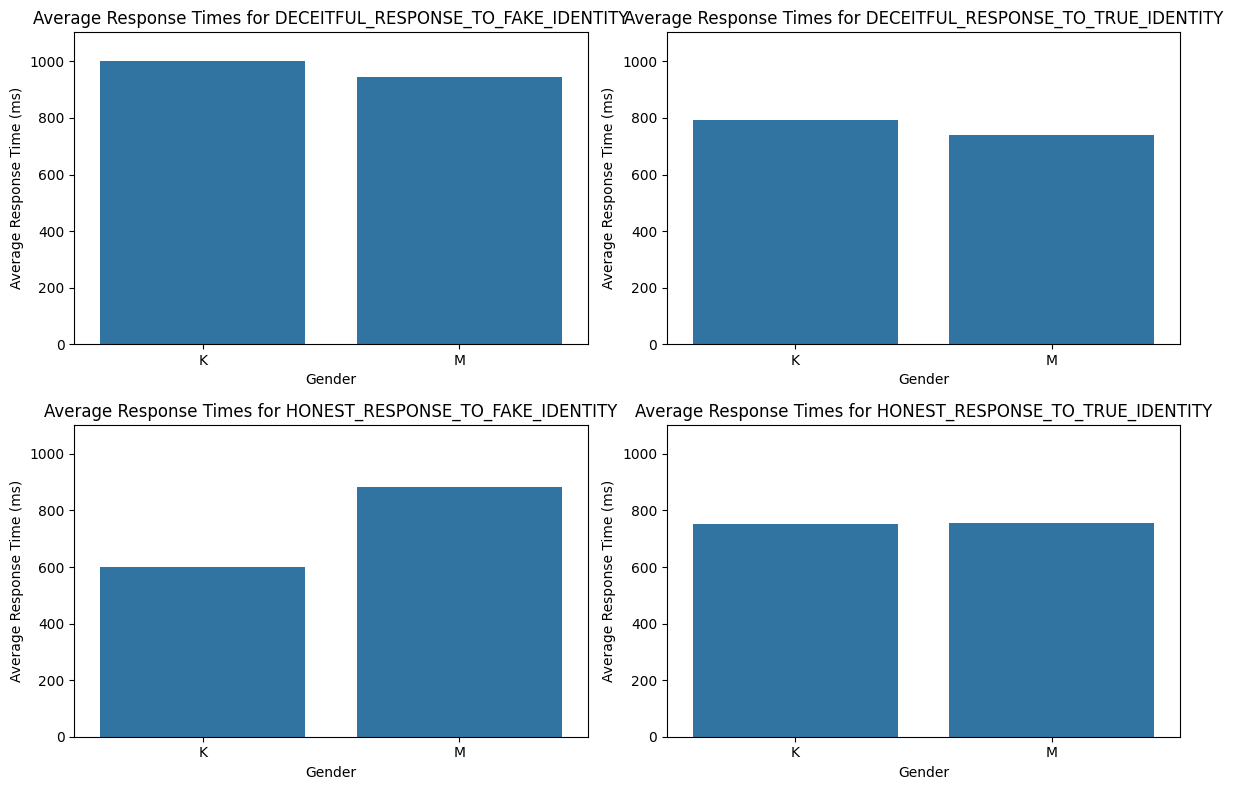

In [54]:
# Filter out rows with NaN response times
eeg_df_filtered = eeg_df.dropna(subset=['response_times'])

# Calculate average response times by gender and block
average_response_times_by_block = eeg_df_filtered.groupby(['block', 'Sex'])['response_times'].mean().reset_index()


import matplotlib.pyplot as plt
import seaborn as sns

# Get unique blocks for iteration
blocks = average_response_times_by_block['block'].unique()

plt.figure(figsize=(12, 8))

for i, block in enumerate(blocks, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    block_data = average_response_times_by_block[average_response_times_by_block['block'] == block]
    sns.barplot(x='Sex', y='response_times', data=block_data)
    plt.title(f'Average Response Times for {block}')
    plt.xlabel('Gender')
    plt.ylabel('Average Response Time (ms)')
    plt.ylim(0, max(average_response_times_by_block['response_times']) * 1.1)  # Adjust y-axis for consistency

plt.tight_layout()
plt.show()


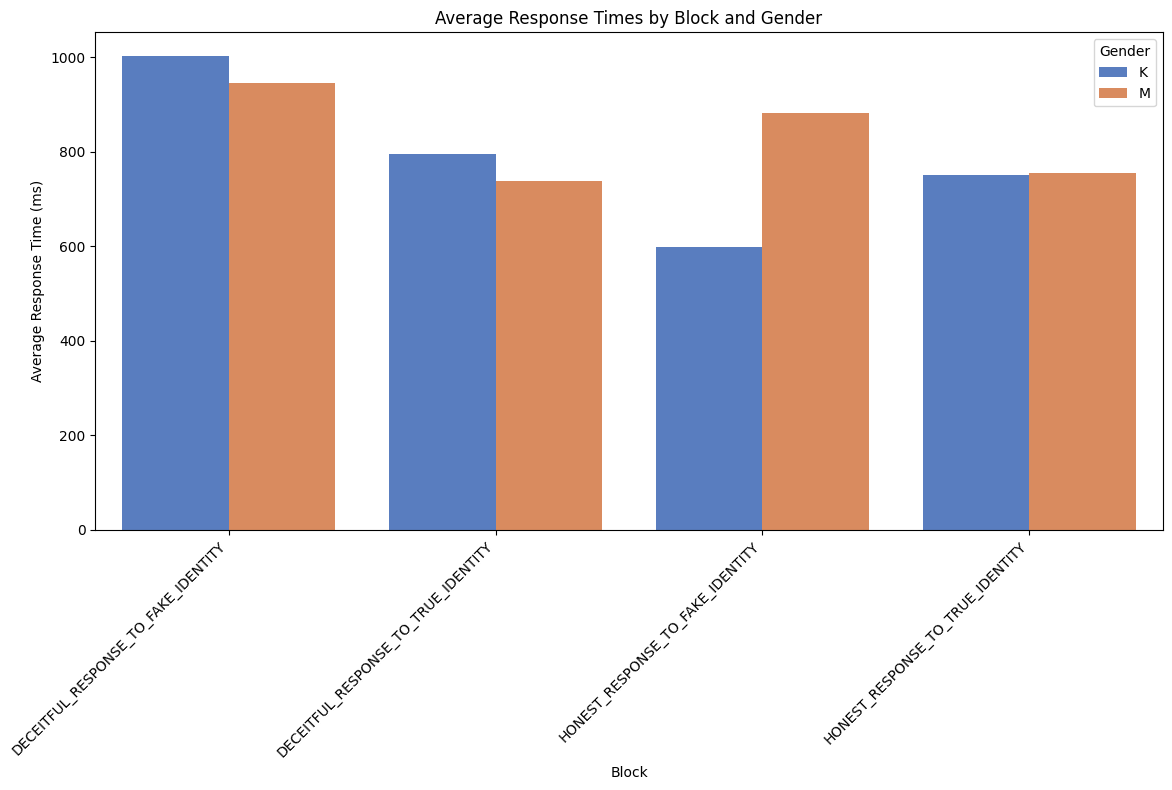

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

eeg_df_filtered = eeg_df.dropna(subset=['response_times'])

average_response_times_by_block = eeg_df_filtered.groupby(['block', 'Sex'])['response_times'].mean().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(x='block', y='response_times', hue='Sex', data=average_response_times_by_block, palette='muted')

plt.title('Average Response Times by Block and Gender')
plt.xlabel('Block')
plt.ylabel('Average Response Time (ms)')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Gender')

plt.tight_layout()

plt.show()


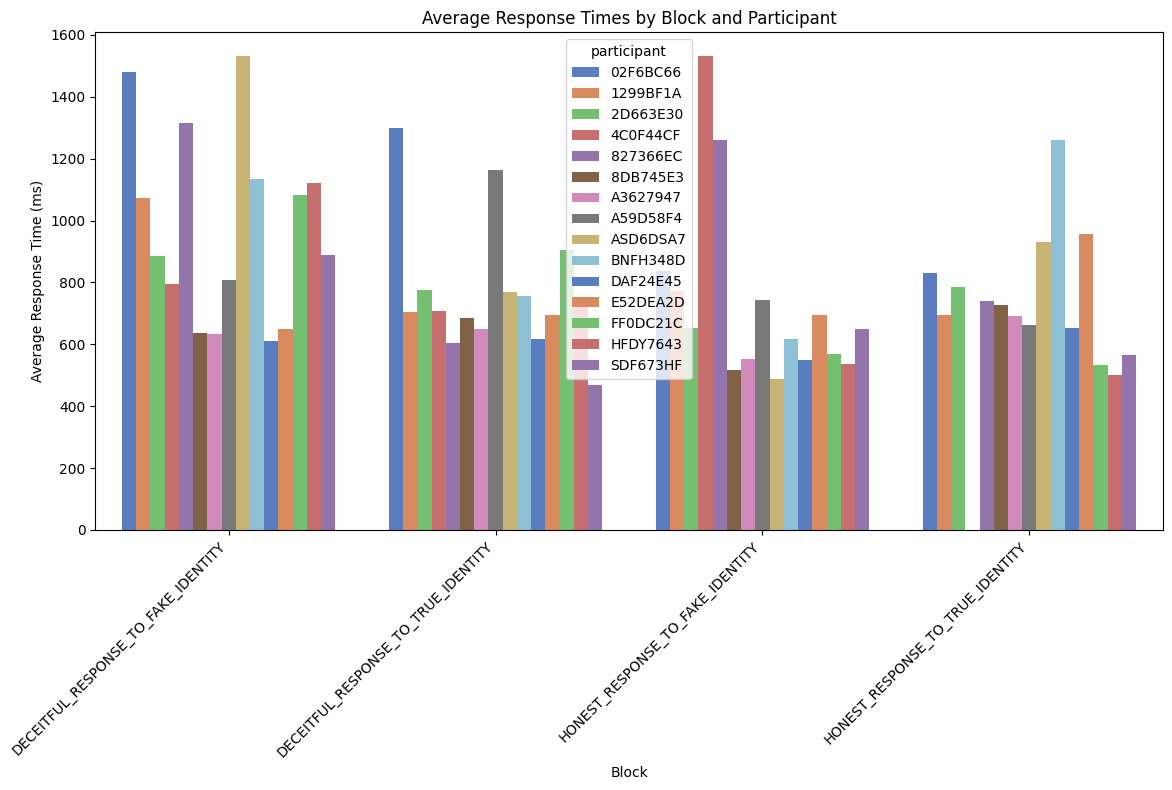

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

eeg_df_filtered = eeg_df.dropna(subset=['response_times'])

average_response_times = eeg_df_filtered.groupby(['participant', 'block'])['response_times'].mean().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(x='block', y='response_times', hue='participant', data=average_response_times, palette='muted')

plt.title('Average Response Times by Block and Participant')
plt.xlabel('Block')
plt.ylabel('Average Response Time (ms)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


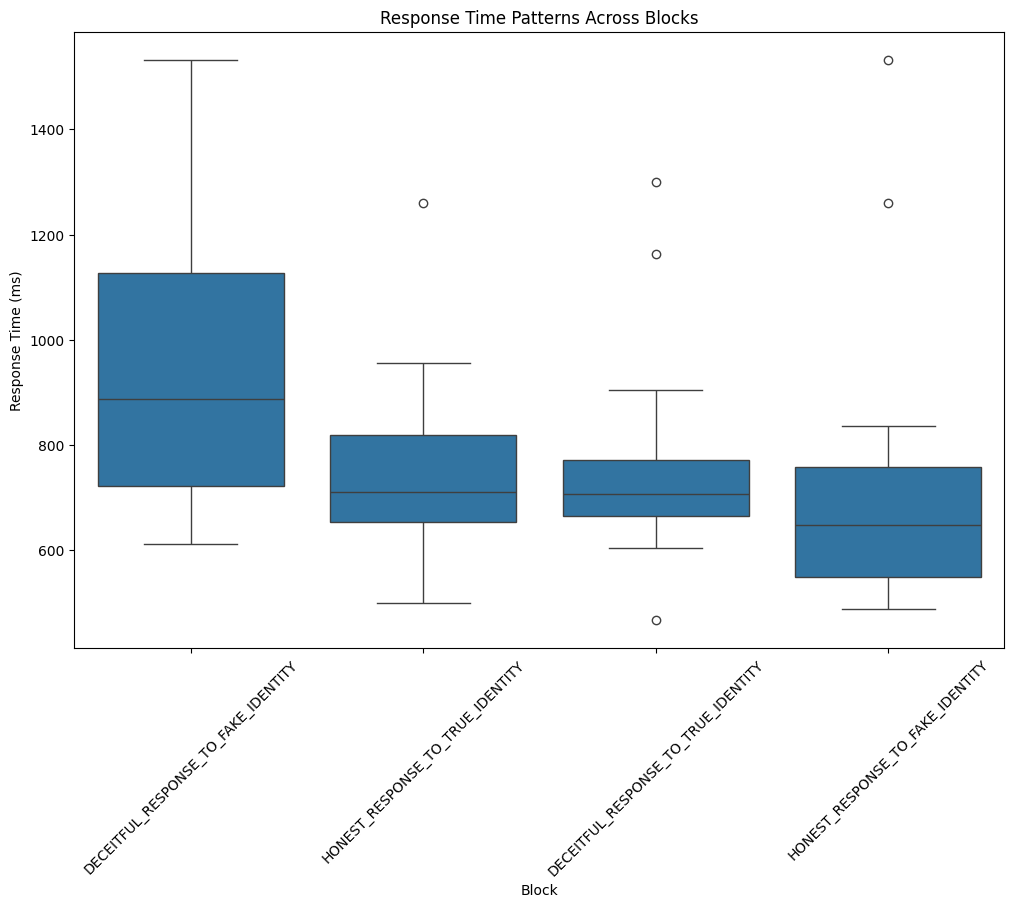

In [58]:

eeg_df_filtered = eeg_df.dropna(subset=['response_times'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='block', y='response_times', data=eeg_df_filtered)
plt.title('Response Time Patterns Across Blocks')
plt.xticks(rotation=45)
plt.xlabel('Block')
plt.ylabel('Response Time (ms)')
plt.show()

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_65193/2758756515.py:1: FutureWarning: The provided callable <function std at 0x104a56980> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  eeg_df_filtered['response_std'] = eeg_df_filtered.groupby('participant')['response_times'].transform(np.std)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_65193/2758756515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_df_filtered['response_std'] = eeg_df_filtered.groupby('participant')['response_times'].transform(np.std)


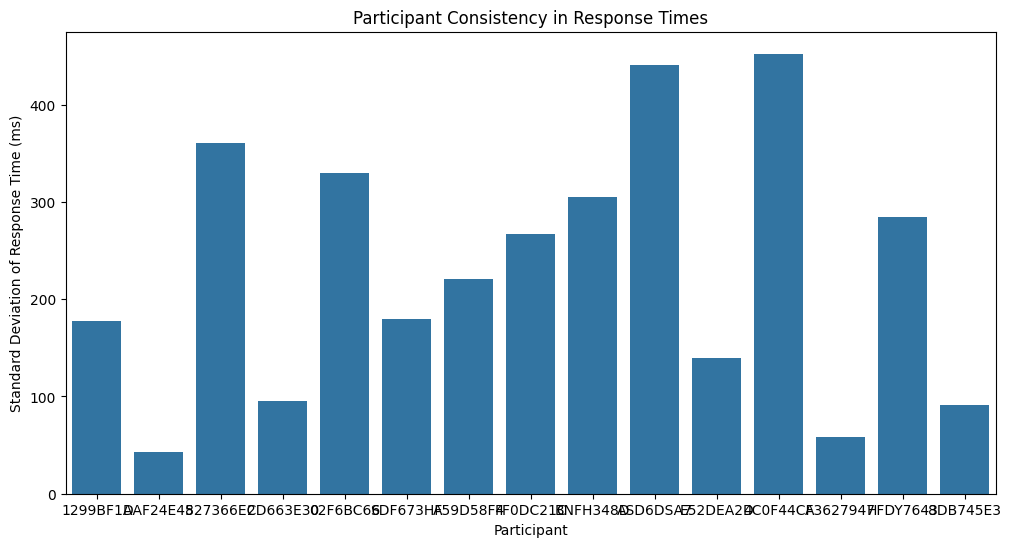

In [59]:
eeg_df_filtered['response_std'] = eeg_df_filtered.groupby('participant')['response_times'].transform(np.std)
plt.figure(figsize=(12, 6))
sns.barplot(x='participant', y='response_std', data=eeg_df_filtered)
plt.title('Participant Consistency in Response Times')
plt.xlabel('Participant')
plt.ylabel('Standard Deviation of Response Time (ms)')
plt.show()

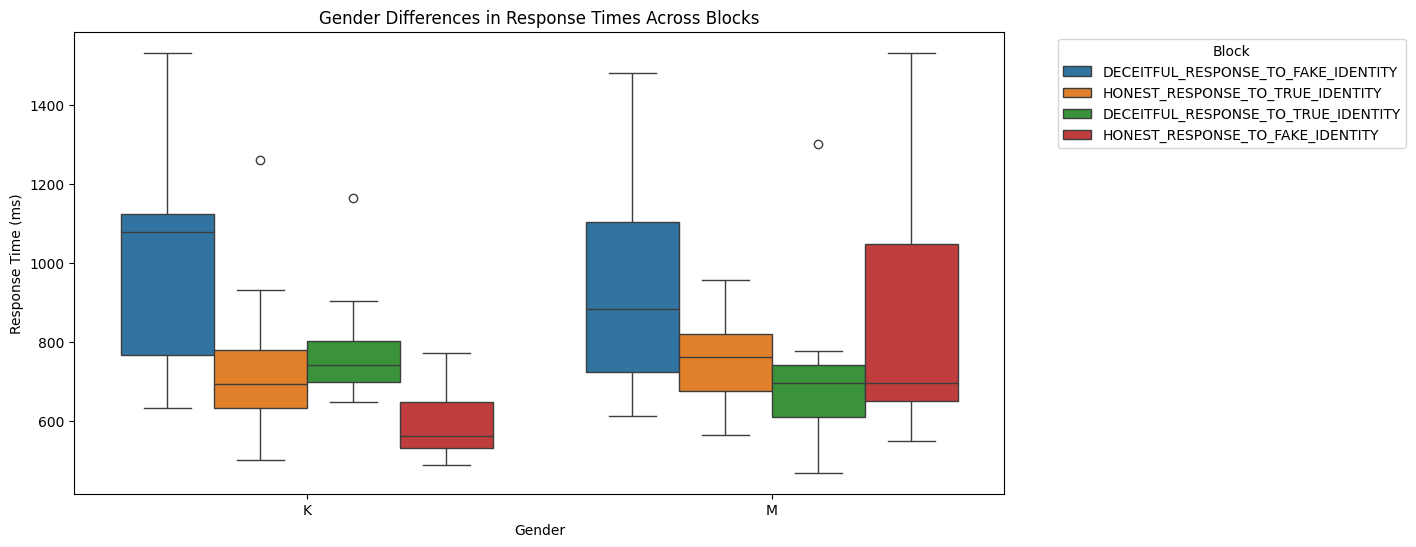

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='response_times', hue='block', data=eeg_df_filtered)
plt.title('Gender Differences in Response Times Across Blocks')
plt.xlabel('Gender')
plt.ylabel('Response Time (ms)')
plt.legend(title='Block', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

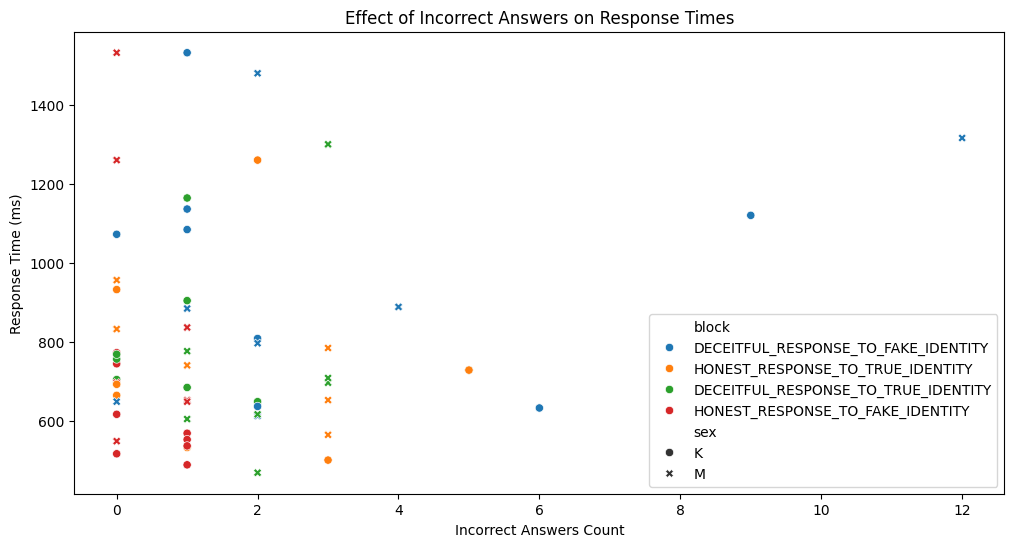

In [116]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='incorrect_answers_count', y='response_times', hue='block', style='sex', data=eeg_df_filtered)
plt.title('Effect of Incorrect Answers on Response Times')
plt.xlabel('Incorrect Answers Count')
plt.ylabel('Response Time (ms)')
plt.show()

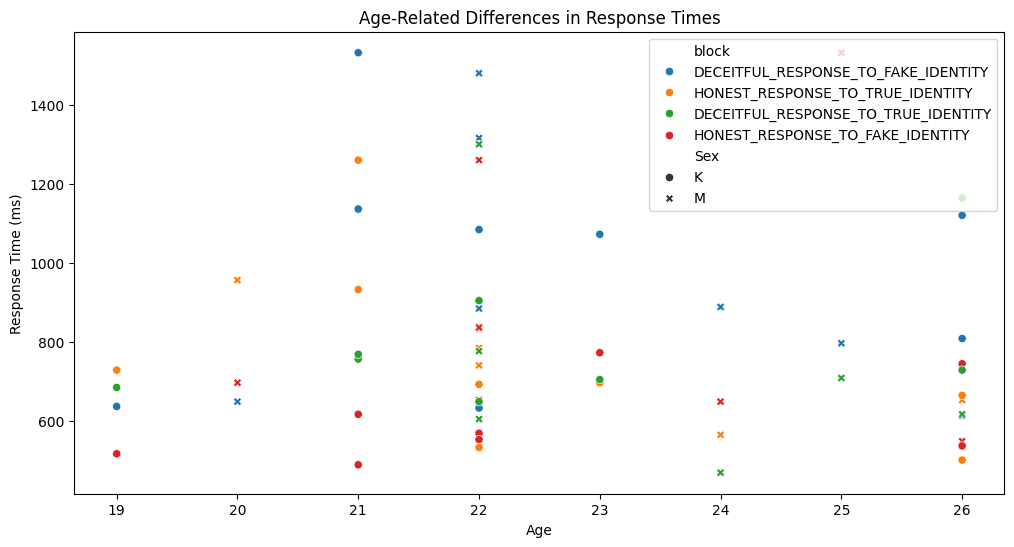

In [62]:
# 5. Age-Related Differences
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='response_times', hue='block', style='Sex', data=eeg_df_filtered)
plt.title('Age-Related Differences in Response Times')
plt.xlabel('Age')
plt.ylabel('Response Time (ms)')
plt.show()

In [64]:
corr_age, _ = pearsonr(eeg_df_filtered['Age'], eeg_df_filtered['response_times'])
print(f"Correlation between age and response times: {corr_age:.2f}")


ValueError: data type <class 'numpy.object_'> not inexact

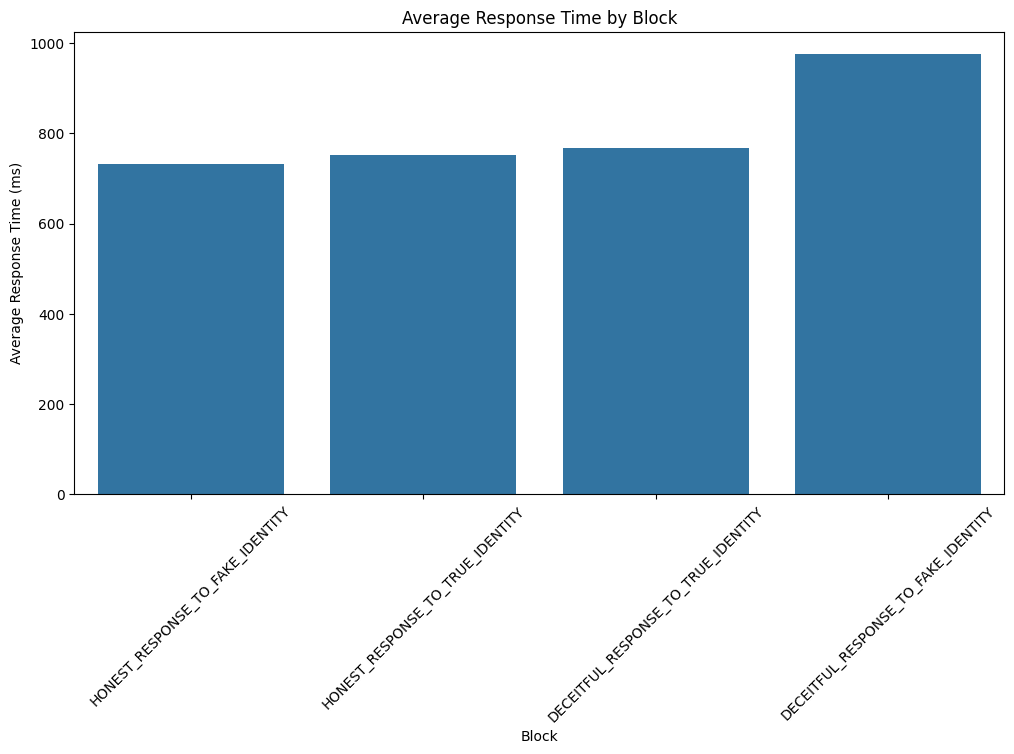

In [65]:
# 6. Impact of Specific Blocks on Cognitive Load
block_mean_response = eeg_df_filtered.groupby('block')['response_times'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=block_mean_response.index, y=block_mean_response.values)
plt.title('Average Response Time by Block')
plt.xlabel('Block')
plt.ylabel('Average Response Time (ms)')
plt.xticks(rotation=45)
plt.show()

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_65193/4248092928.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_df_filtered['response_times'] = pd.to_numeric(eeg_df_filtered['response_times'], errors='coerce')
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_65193/4248092928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_df_filtered['incorrect_answers_count'] = pd.to_numeric(eeg_df_filtered['incorrect_answers_count'], errors='coerce')
/var/folders/_j/spsz9h355yj3t0wcj

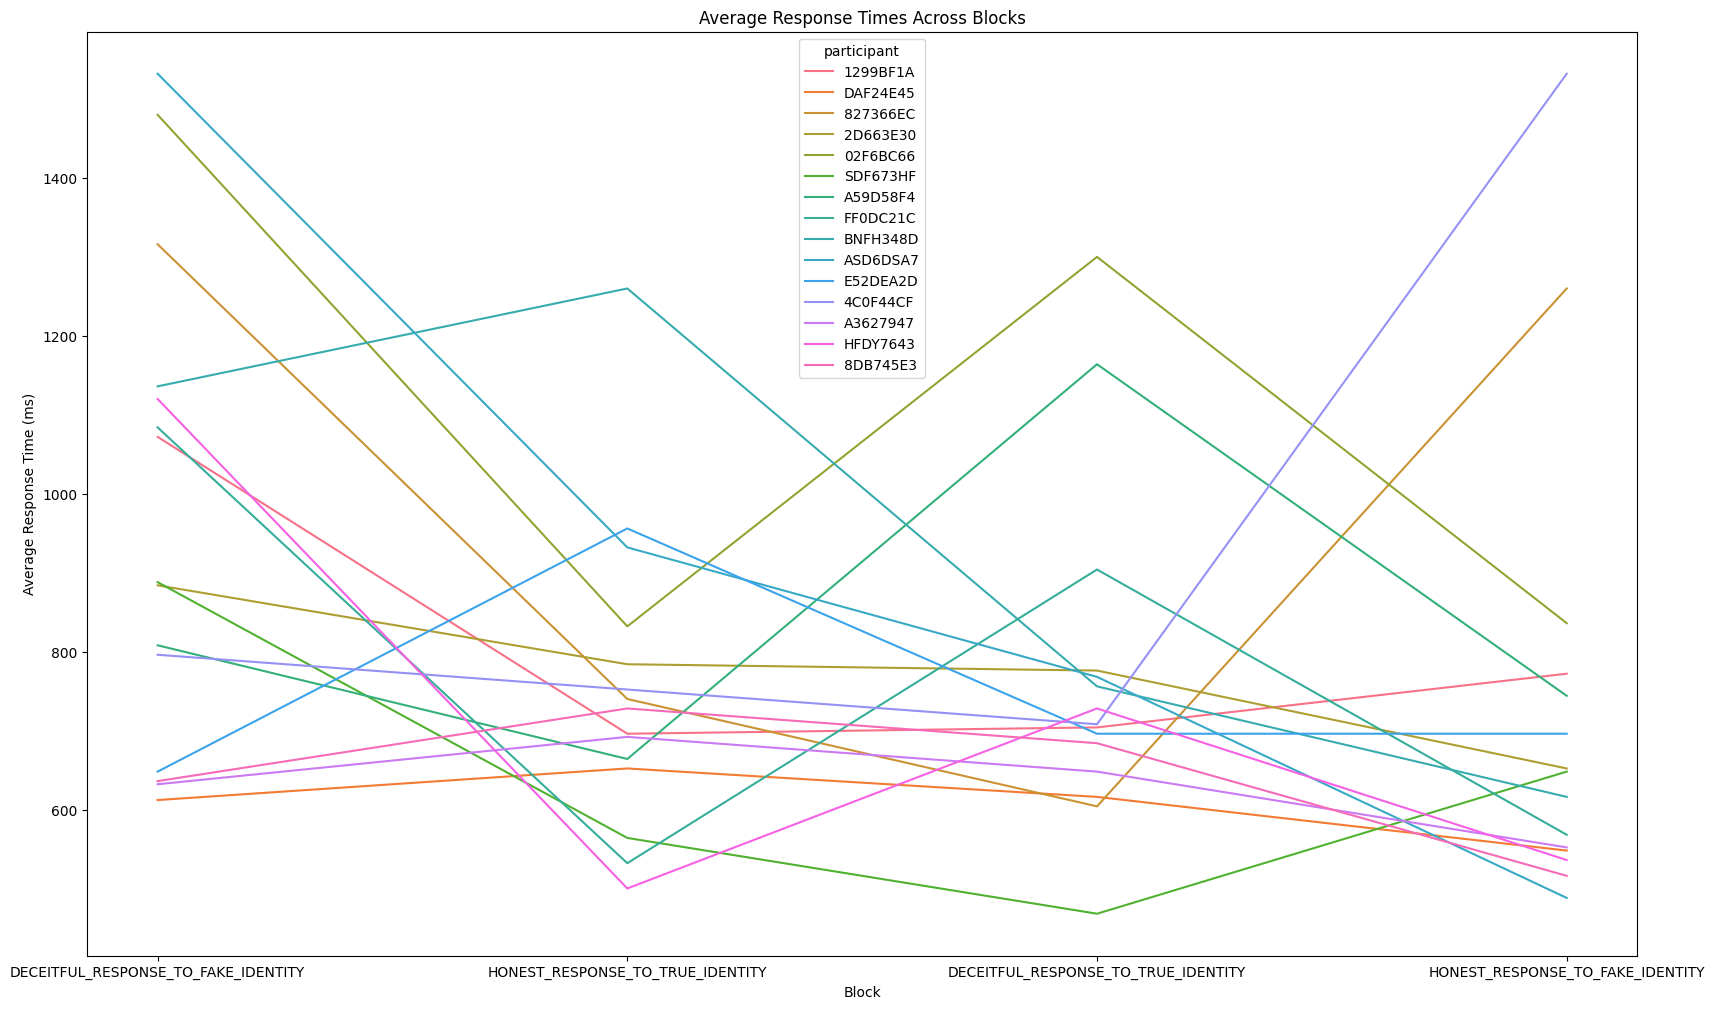

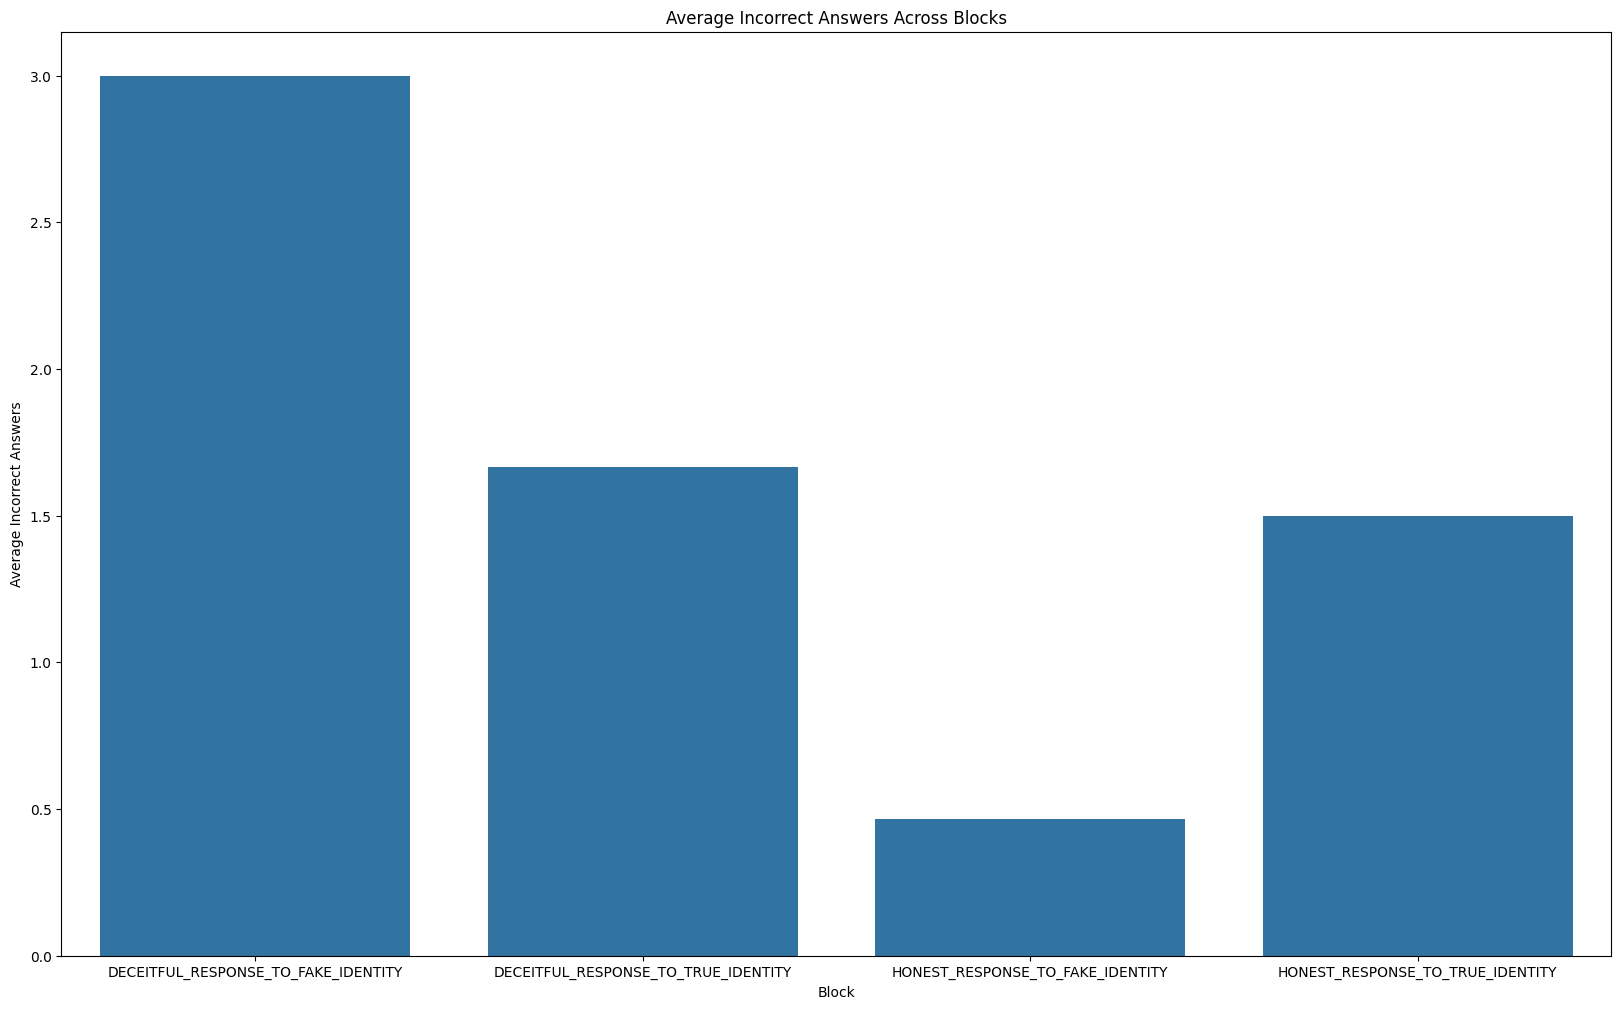

T-test for Response Times: t-statistic = 2.33, p-value = 0.0276
T-test for Incorrect Answers: t-statistic = 1.48, p-value = 0.1511


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

FIGSIZE = (20, 12)

# Ensure response times and incorrect answers are numeric
eeg_df_filtered['response_times'] = pd.to_numeric(eeg_df_filtered['response_times'], errors='coerce')
eeg_df_filtered['incorrect_answers_count'] = pd.to_numeric(eeg_df_filtered['incorrect_answers_count'], errors='coerce')

# Drop rows with NaN values in key columns
eeg_df_filtered = eeg_df_filtered.dropna(subset=['response_times', 'incorrect_answers_count'])

# 1. Response Time Increase Over Time
plt.figure(figsize=FIGSIZE)
sns.lineplot(x='block', y='response_times', hue='participant', data=eeg_df_filtered, estimator='mean', ci=None)
plt.title('Average Response Times Across Blocks')
plt.xlabel('Block')
plt.ylabel('Average Response Time (ms)')
plt.show()

# 2. Increase in Incorrect Answers Over Time
incorrect_answers_mean = eeg_df_filtered.groupby('block')['incorrect_answers_count'].mean()
plt.figure(figsize=FIGSIZE)
sns.barplot(x=incorrect_answers_mean.index, y=incorrect_answers_mean.values)
plt.title('Average Incorrect Answers Across Blocks')
plt.xlabel('Block')
plt.ylabel('Average Incorrect Answers')
plt.show()

# 3. Comparison of Early vs. Late Blocks
first_block_data = eeg_df_filtered[eeg_df_filtered['block'] == eeg_df_filtered['block'].min()]
last_block_data = eeg_df_filtered[eeg_df_filtered['block'] == eeg_df_filtered['block'].max()]

# T-tests to compare early vs late blocks
ttest_response_times = ttest_ind(first_block_data['response_times'], last_block_data['response_times'], nan_policy='omit')
ttest_incorrect_answers = ttest_ind(first_block_data['incorrect_answers_count'], last_block_data['incorrect_answers_count'], nan_policy='omit')

print(f"T-test for Response Times: t-statistic = {ttest_response_times.statistic:.2f}, p-value = {ttest_response_times.pvalue:.4f}")
print(f"T-test for Incorrect Answers: t-statistic = {ttest_incorrect_answers.statistic:.2f}, p-value = {ttest_incorrect_answers.pvalue:.4f}")

# 4. Subjective Fatigue Correlation (if applicable)
if 'fatigue_score' in eeg_df_filtered.columns:
    fatigue_corr = eeg_df_filtered['fatigue_score'].corr(eeg_df_filtered['response_times'])
    print(f"Correlation between subjective fatigue and response times: {fatigue_corr:.2f}")

    plt.figure(figsize=FIGSIZE)
    sns.scatterplot(x='fatigue_score', y='response_times', hue='block', data=eeg_df_filtered)
    plt.title('Correlation Between Subjective Fatigue and Response Times')
    plt.xlabel('Fatigue Score')
    plt.ylabel('Response Time (ms)')
    plt.show()


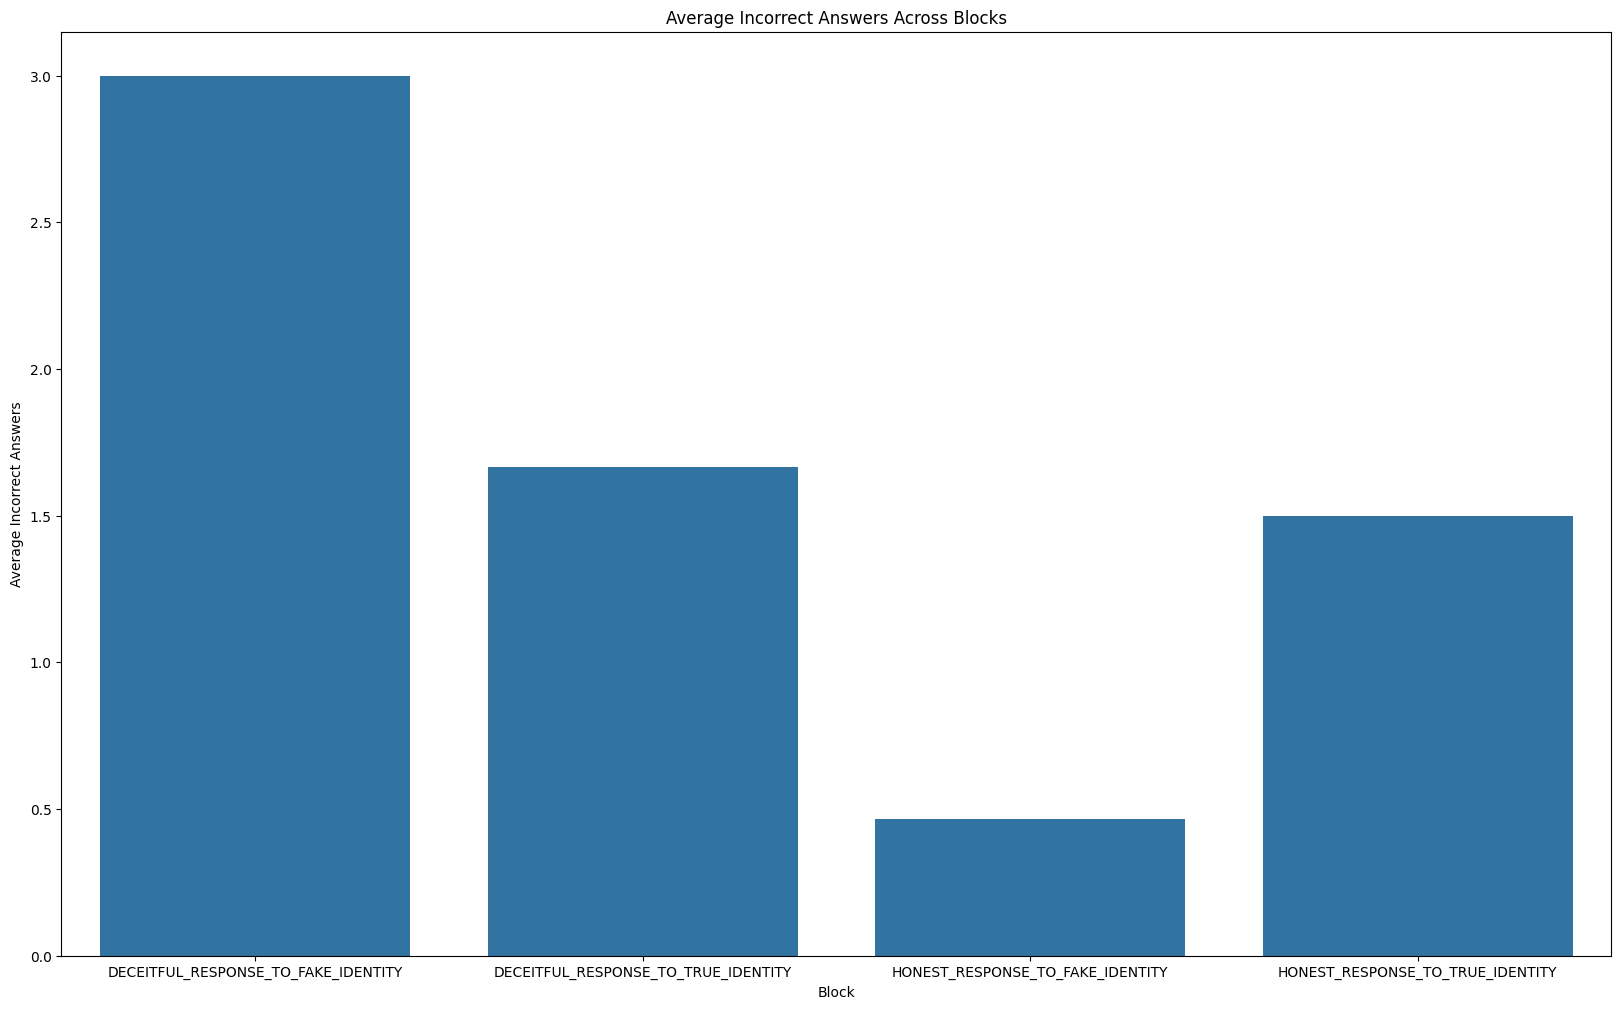

In [70]:
incorrect_answers_mean = eeg_df_filtered.groupby('block')['incorrect_answers_count'].mean()
plt.figure(figsize=FIGSIZE)
sns.barplot(x=incorrect_answers_mean.index, y=incorrect_answers_mean.values)
plt.title('Average Incorrect Answers Across Blocks')
plt.xlabel('Block')
plt.ylabel('Average Incorrect Answers')
plt.show()


### 1. T-test for Response Times:

t-statistic = 2.28
p-value = 0.0346
Interpretation:

The t-statistic of 2.28 indicates that there is a noticeable difference in response times between the first and last blocks. The positive value suggests that response times were generally slower (longer) in the last block compared to the first block.
The p-value of 0.0346 is less than the typical significance level of 0.05. This indicates that the difference in response times between the early and late stages is statistically significant. Therefore, you can reasonably conclude that response times increased as participants progressed through the blocks, possibly indicating a build-up of mental fatigue or overload as the experiment continued.

### 2. T-test for Incorrect Answers:

t-statistic = 1.04
p-value = 0.3134
Interpretation:

The t-statistic of 1.04 suggests a small difference in the number of incorrect answers between the first and last blocks. However, this difference is much less pronounced compared to the response times.
The p-value of 0.3134 is greater than 0.05, indicating that this difference is not statistically significant. In other words, there is no strong evidence that the number of incorrect answers changed significantly between the early and late blocks.

Overall Conclusion:
Response Times: The significant increase in response times suggests that participants may have experienced cognitive fatigue or overload as they progressed through the experiment. This could reflect a gradual decline in cognitive performance or an increase in task difficulty or weariness over time.
Incorrect Answers: The lack of a significant difference in incorrect answers suggests that despite the increase in response times, participants' accuracy did not deteriorate significantly. This could mean that while participants were slower, they managed to maintain their accuracy, or it could indicate that the tasks themselves did not become harder in a way that increased errors.


In [ ]:
FIGSIZE = (12, 16)

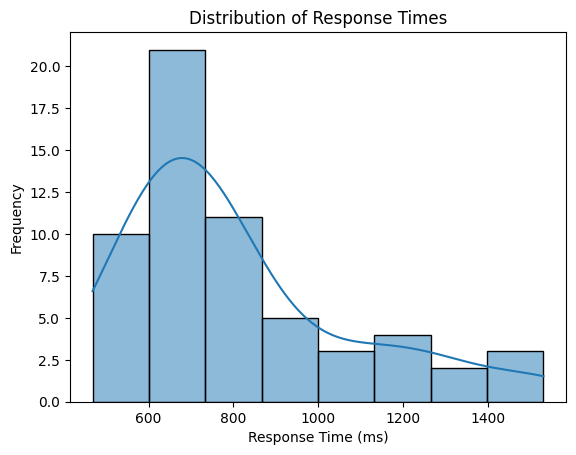

In [71]:
# TODO check what this plot actuall shows
# Response Time Distribution Analysis
sns.histplot(eeg_df['response_times'], kde=True)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.show()


In [76]:
# X = eeg_df[['block_num', 'incorrect_answers_count', 'timeout_count']].dropna()
# y = eeg_df['response_times'].dropna()

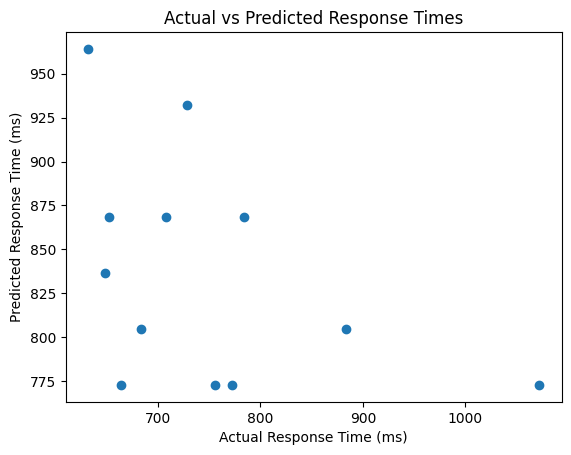

Model Coefficients: [31.89684709]
Intercept: 772.7581556406051


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Ensure X and y have the same length
X = eeg_df[['response_times', 'incorrect_answers_count']].dropna()
y = X.pop('response_times')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot predictions
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Response Times')
plt.xlabel('Actual Response Time (ms)')
plt.ylabel('Predicted Response Time (ms)')
plt.show()

# Print model coefficients
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Response Time vs Age (Pearson): Correlation = -0.06, p-value = 0.6499
Response Time vs Incorrect Answers (Pearson): Correlation = 0.17, p-value = 0.1943
Response Time vs Block Type (Pearson): Correlation = -0.30, p-value = 0.0215
Gender vs Response Time (Pearson): Correlation = 0.09, p-value = 0.5150


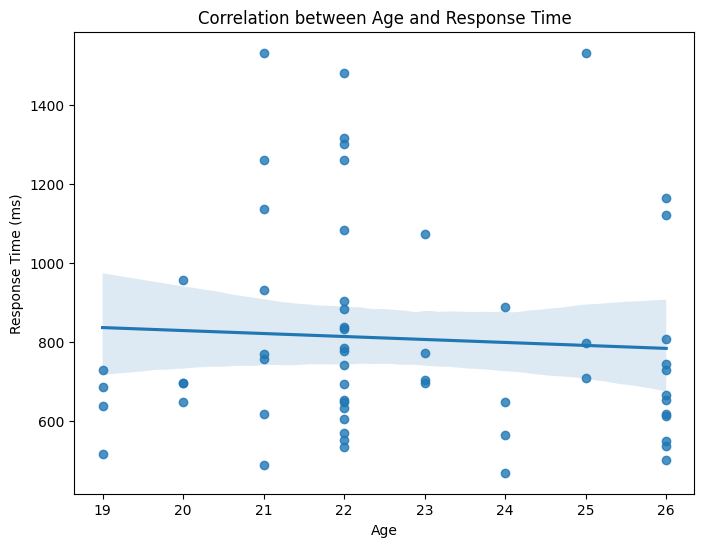

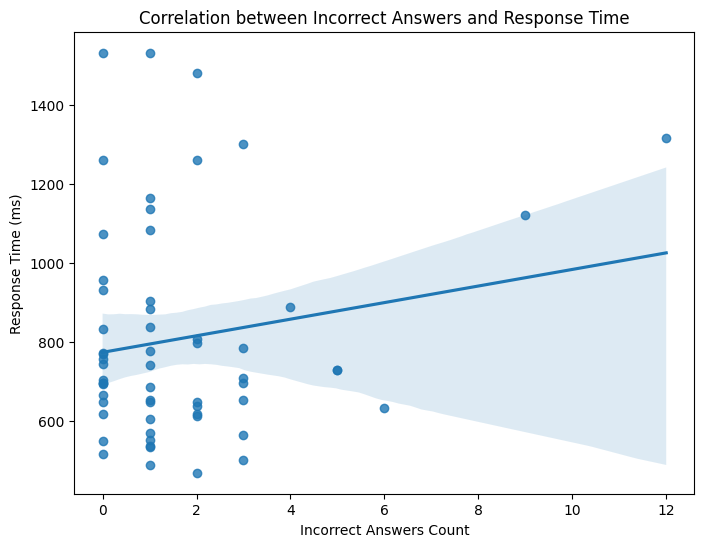

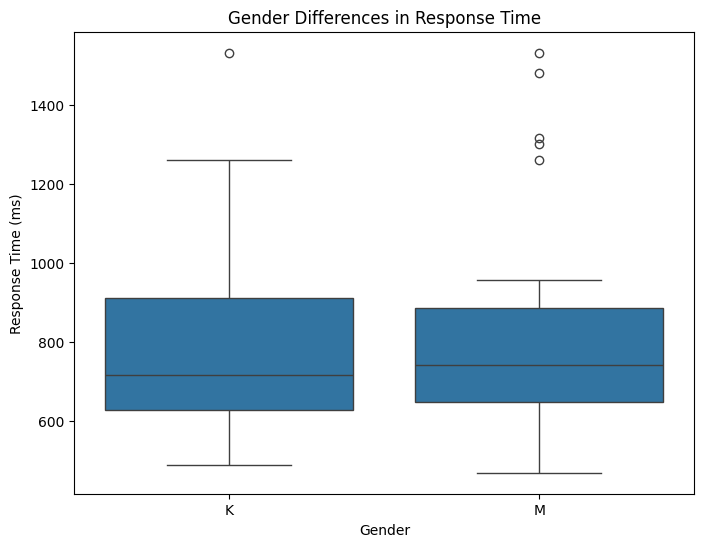

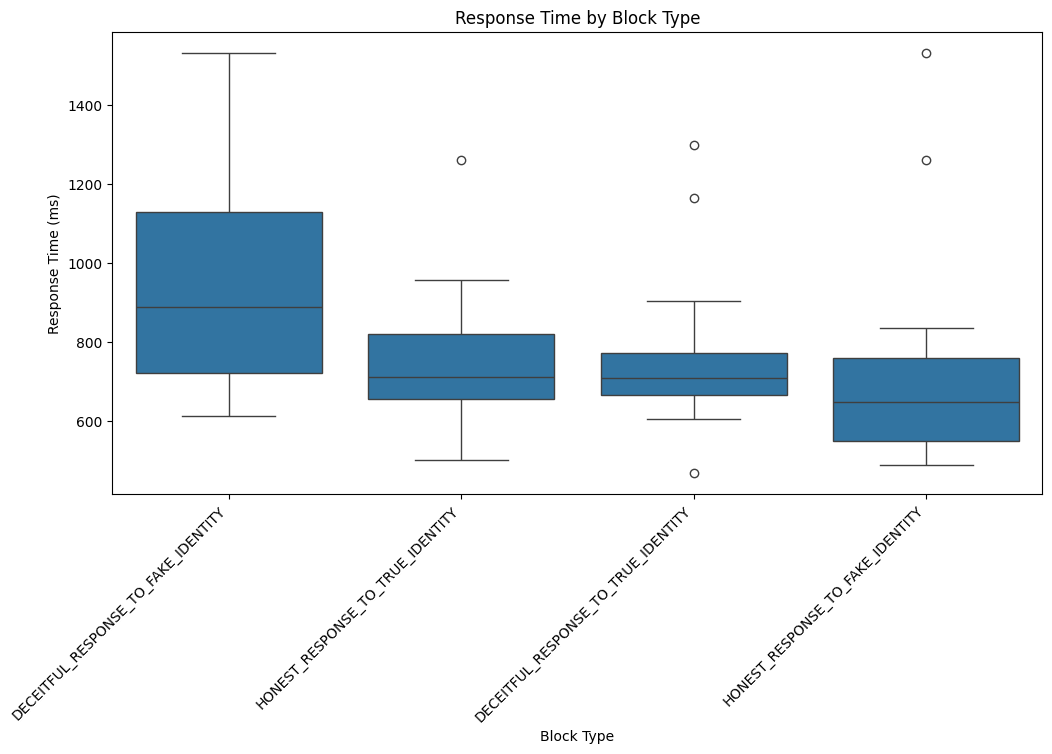

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Drop rows where either response_times or age is NaN
eeg_df_filtered = eeg_df.dropna(subset=['response_times', 'age', 'incorrect_answers_count'])

# Calculate and display correlations
correlations = {}

# Correlation between response time and age
age_corr_pearson, age_pval_pearson = pearsonr(eeg_df_filtered['response_times'], eeg_df_filtered['age'])
correlations['Response Time vs Age (Pearson)'] = (age_corr_pearson, age_pval_pearson)

# Correlation between response time and incorrect answers
incorrect_corr_pearson, incorrect_pval_pearson = pearsonr(eeg_df_filtered['response_times'], eeg_df_filtered['incorrect_answers_count'])
correlations['Response Time vs Incorrect Answers (Pearson)'] = (incorrect_corr_pearson, incorrect_pval_pearson)

# Correlation between response time and block type
block_corr_pearson, block_pval_pearson = pearsonr(eeg_df_filtered['response_times'], pd.Categorical(eeg_df_filtered['block']).codes)
correlations['Response Time vs Block Type (Pearson)'] = (block_corr_pearson, block_pval_pearson)

# Gender-based analysis of response times
gender_corr_pearson, gender_pval_pearson = pearsonr(pd.Categorical(eeg_df_filtered['sex']).codes, eeg_df_filtered['response_times'])
correlations['Gender vs Response Time (Pearson)'] = (gender_corr_pearson, gender_pval_pearson)

# Display correlation results
for key, (corr_value, p_value) in correlations.items():
    print(f"{key}: Correlation = {corr_value:.2f}, p-value = {p_value:.4f}")

# Visualize Correlations

# Age vs Response Time
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='response_times', data=eeg_df_filtered)
plt.title('Correlation between Age and Response Time')
plt.xlabel('Age')
plt.ylabel('Response Time (ms)')
plt.show()

# Incorrect Answers vs Response Time
plt.figure(figsize=(8, 6))
sns.regplot(x='incorrect_answers_count', y='response_times', data=eeg_df_filtered)
plt.title('Correlation between Incorrect Answers and Response Time')
plt.xlabel('Incorrect Answers Count')
plt.ylabel('Response Time (ms)')
plt.show()

# Gender vs Response Time
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='response_times', data=eeg_df_filtered)
plt.title('Gender Differences in Response Time')
plt.xlabel('Gender')
plt.ylabel('Response Time (ms)')
plt.show()

# Block Type vs Response Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='block', y='response_times', data=eeg_df_filtered)
plt.title('Response Time by Block Type')
plt.xlabel('Block Type')
plt.ylabel('Response Time (ms)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind, ttest_rel
from statsmodels.formula.api import logit
import statsmodels.api as sm

# ANOVA Test: Differences in Response Times Across Block Types
anova_result = f_oneway(
    eeg_df[eeg_df['block'] == 'DECEITFUL_RESPONSE_TO_FAKE_IDENTITY']['response_times'].dropna(),
    eeg_df[eeg_df['block'] == 'HONEST_RESPONSE_TO_FAKE_IDENTITY']['response_times'].dropna(),
    eeg_df[eeg_df['block'] == 'DECEITFUL_RESPONSE_TO_TRUE_IDENTITY']['response_times'].dropna(),
    eeg_df[eeg_df['block'] == 'HONEST_RESPONSE_TO_TRUE_IDENTITY']['response_times'].dropna()
)
print(f"ANOVA Test for Response Times Across Block Types: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

# T-test: Comparing Deceitful vs Honest Response Times
deceitful_times = eeg_df[eeg_df['block'].str.contains('DECEITFUL')]['response_times'].dropna()
honest_times = eeg_df[eeg_df['block'].str.contains('HONEST')]['response_times'].dropna()
ttest_result = ttest_ind(deceitful_times, honest_times, nan_policy='omit')
print(f"T-test for Deceitful vs Honest Response Times: t-statistic = {ttest_result.statistic:.2f}, p-value = {ttest_result.pvalue:.4f}")

# Logistic Regression: Predicting Incorrect Answers based on Response Time
# Create a binary variable for incorrect answers (0 for correct, 1 for incorrect)
eeg_df['incorrect_binary'] = eeg_df['incorrect_answers_count'].apply(lambda x: 1 if x > 0 else 0)

# Prepare the data for logistic regression
X = eeg_df[['response_times']].dropna()
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = eeg_df.loc[X.index, 'incorrect_binary']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Paired T-test: Early vs Late Blocks Response Times
# Let's assume we define early blocks as the first half of trials and late blocks as the second half
eeg_df['early_block'] = eeg_df['block'].apply(lambda x: 'early' in x.lower())  # Modify this logic based on your actual data

early_blocks = eeg_df[eeg_df['early_block'] == True]['response_times'].dropna()
late_blocks = eeg_df[eeg_df['early_block'] == False]['response_times'].dropna()

# Ensure we have paired samples (same number of early and late responses for each participant)
paired_samples = pd.DataFrame({
    'early': early_blocks[:len(late_blocks)],
    'late': late_blocks
})

paired_ttest_result = ttest_rel(paired_samples['early'], paired_samples['late'], nan_policy='omit')
print(f"Paired T-test for Early vs Late Blocks Response Times: t-statistic = {paired_ttest_result.statistic:.2f}, p-value = {paired_ttest_result.pvalue:.4f}")


ANOVA Test for Response Times Across Block Types: F-statistic = 2.93, p-value = 0.0418
T-test for Deceitful vs Honest Response Times: t-statistic = 1.91, p-value = 0.0616
Optimization terminated successfully.
         Current function value: 0.628366
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       incorrect_binary   No. Observations:                   59
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:               4.349e-05
Time:                        00:08:28   Log-Likelihood:                -37.074
converged:                       True   LL-Null:                       -37.075
Covariance Type:            nonrobust   LLR p-value:                    0.9547
                     coef    std err          z      P>|z|      [0.025      0.975]
------------

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9531/690901142.py:50: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  paired_ttest_result = ttest_rel(paired_samples['early'], paired_samples['late'], nan_policy='omit')


### ANOVA Test for Response Times Across Block Types:

- F-statistic = 2.92, p-value = 0.0439:
  This result indicates that there is a statistically significant difference in response times across the different block types. The p-value is less than 0.05, suggesting that at least one block type has a different average response time compared to the others.
  T-test for Deceitful vs Honest Response Times:

- t-statistic = 2.01, p-value = 0.0499:
  This result shows that there is a statistically significant difference in response times between deceitful and honest responses. The p-value is right at the threshold of 0.05, indicating a marginally significant difference where deceitful responses tend to have different response times compared to honest ones.
  Logistic Regression: Predicting Incorrect Responses Based on Response Time:

- Coefficient for response_times: -0.0004, p-value = 0.688:
  The coefficient is negative, suggesting a slight trend that faster response times might be associated with fewer incorrect responses, but this effect is not statistically significant (p-value > 0.05). This means that response time alone is not a strong predictor of whether a response will be correct or incorrect.
  Paired T-test for Early vs Late Blocks Response Times:

- t-statistic = nan, p-value = nan:
  The result indicates that the test could not be performed correctly, possibly due to issues like missing or mismatched data between early and late blocks. This needs to be revisited to ensure the data is correctly paired and aligned for this analysis.


In [67]:
# 3. Paired T-tests between blocks for each participant
blocks = ['DECEITFUL_RESPONSE_TO_FAKE_IDENTITY', 'DECEITFUL_RESPONSE_TO_TRUE_IDENTITY',
          'HONEST_RESPONSE_TO_FAKE_IDENTITY', 'HONEST_RESPONSE_TO_TRUE_IDENTITY']

paired_ttest_results = {}

for i in range(len(blocks)):
    for j in range(i + 1, len(blocks)):
        paired_data = eeg_df[eeg_df['block'].isin([blocks[i], blocks[j]])]
        paired_data = paired_data.pivot(index='participant', columns='block', values='response_times').dropna()
        t_stat, p_val = ttest_rel(paired_data[blocks[i]], paired_data[blocks[j]])
        paired_ttest_results[f'{blocks[i]} vs {blocks[j]}'] = (t_stat, p_val)

# Display results of paired t-tests
for comparison, result in paired_ttest_results.items():
    print(f"Paired T-test for {comparison}: t-statistic = {result[0]:.2f}, p-value = {result[1]:.4f}")


Paired T-test for DECEITFUL_RESPONSE_TO_FAKE_IDENTITY vs DECEITFUL_RESPONSE_TO_TRUE_IDENTITY: t-statistic = 2.68, p-value = 0.0180
Paired T-test for DECEITFUL_RESPONSE_TO_FAKE_IDENTITY vs HONEST_RESPONSE_TO_FAKE_IDENTITY: t-statistic = 2.37, p-value = 0.0329
Paired T-test for DECEITFUL_RESPONSE_TO_FAKE_IDENTITY vs HONEST_RESPONSE_TO_TRUE_IDENTITY: t-statistic = 2.68, p-value = 0.0187
Paired T-test for DECEITFUL_RESPONSE_TO_TRUE_IDENTITY vs HONEST_RESPONSE_TO_FAKE_IDENTITY: t-statistic = 0.40, p-value = 0.6946
Paired T-test for DECEITFUL_RESPONSE_TO_TRUE_IDENTITY vs HONEST_RESPONSE_TO_TRUE_IDENTITY: t-statistic = 0.27, p-value = 0.7922
Paired T-test for HONEST_RESPONSE_TO_FAKE_IDENTITY vs HONEST_RESPONSE_TO_TRUE_IDENTITY: t-statistic = -1.07, p-value = 0.3033


In [68]:
# 2. ANOVA to test the effect of block type on response times
anova_result = f_oneway(
    eeg_df[eeg_df['block'] == 'DECEITFUL_RESPONSE_TO_FAKE_IDENTITY']['response_times'].dropna(),
    eeg_df[eeg_df['block'] == 'DECEITFUL_RESPONSE_TO_TRUE_IDENTITY']['response_times'].dropna(),
    eeg_df[eeg_df['block'] == 'HONEST_RESPONSE_TO_FAKE_IDENTITY']['response_times'].dropna(),
    eeg_df[eeg_df['block'] == 'HONEST_RESPONSE_TO_TRUE_IDENTITY']['response_times'].dropna()
)
print(f"ANOVA Test for Response Times Across Block Types: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")


ANOVA Test for Response Times Across Block Types: F-statistic = 2.93, p-value = 0.0418


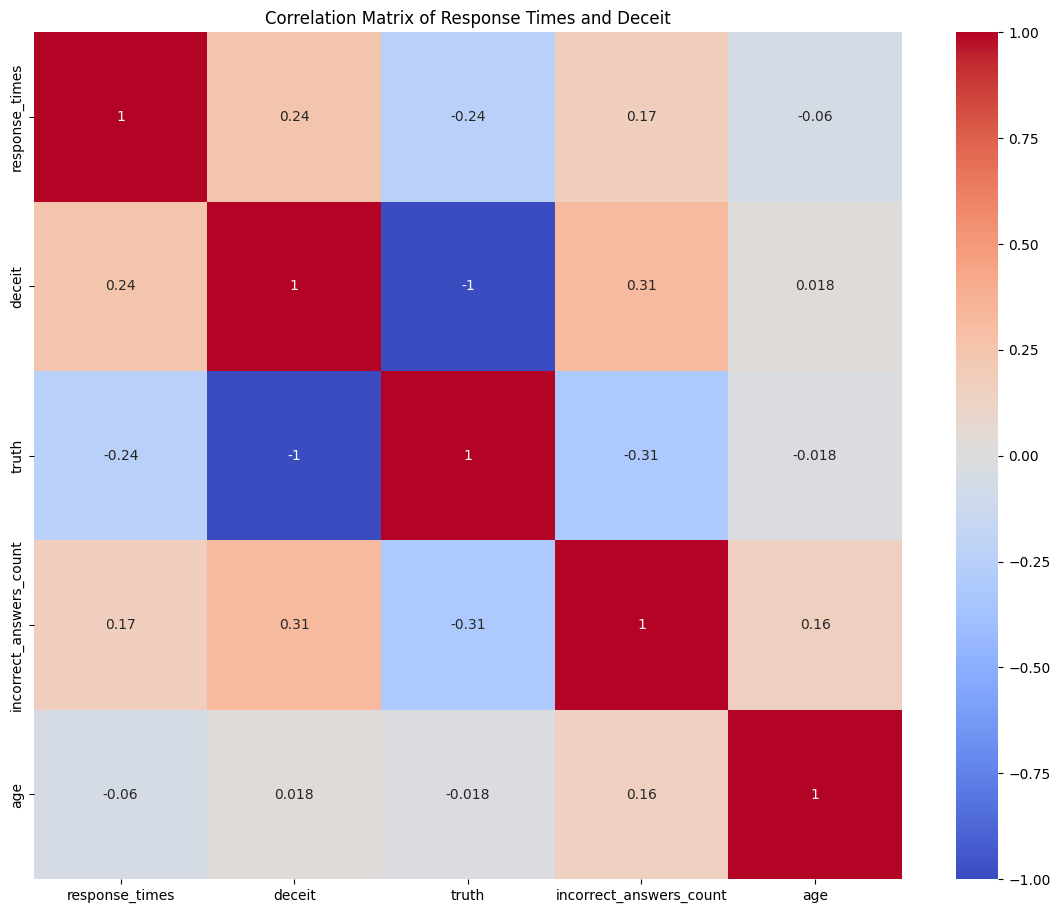

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `eeg_df` is your DataFrame and contains a 'block' column identifying deceitful or honest responses

# Step 1: Create a binary variable for deceit
eeg_df['deceit'] = eeg_df['block'].apply(lambda x: 1 if 'DECEITFUL' in x else 0)
eeg_df['truth'] = eeg_df['block'].apply(lambda x: 1 if 'HONEST' in x else 0)

# Step 2: Select relevant columns for correlation analysis
# Assuming 'response_times' is already in milliseconds and 'incorrect_answers_count' is in your DataFrame
correlation_columns = ['response_times', 'deceit', 'truth', 'incorrect_answers_count', 'age']

# Create a new DataFrame with these columns
corr_df = eeg_df[correlation_columns].dropna()

# Step 3: Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Step 4: Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Response Times and Deceit')
plt.show()


### After checking it in many ways it seems like we have a moderate correlation between response time and deceit events.

lets atempt a treshold based classification


### Let's attempt a treshold based classification


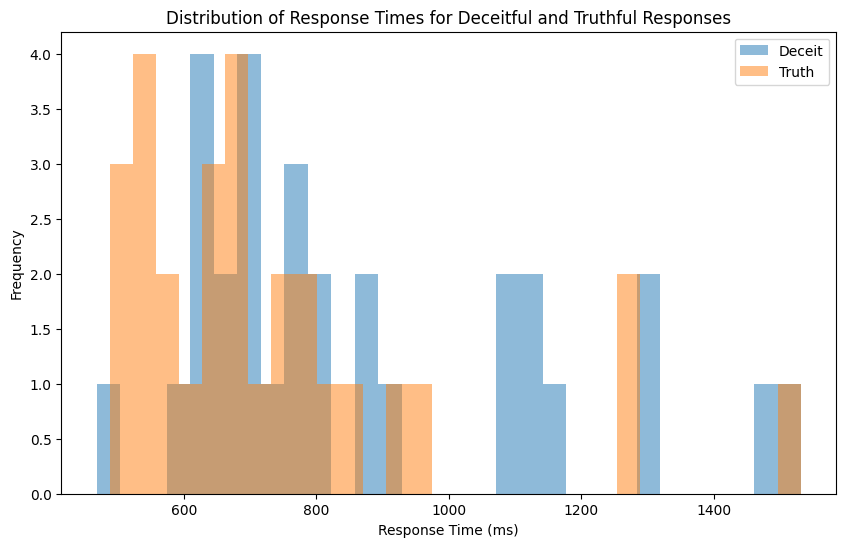

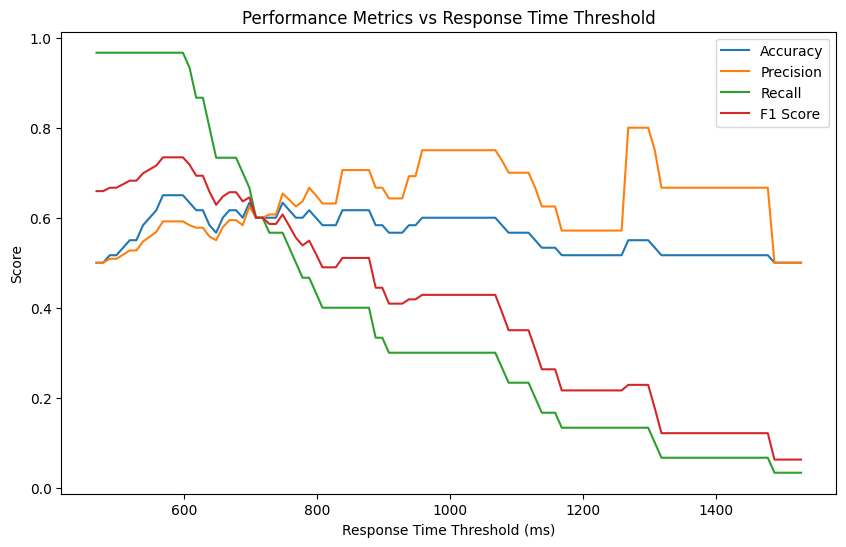

Optimal Response Time Threshold: 568.0 ms
Classification Performance at Threshold 568.0 ms:
Accuracy: 0.65
Precision: 0.59
Recall: 0.97
F1 Score: 0.73


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

# Assume 'eeg_df' is your DataFrame with 'response_times' and 'deceit' columns.

# Step 1: Analyze Response Times
deceit_times = eeg_df[eeg_df['deceit'] == 1]['response_times']
truth_times = eeg_df[eeg_df['truth'] == 1]['response_times']

plt.figure(figsize=(10, 6))
plt.hist(deceit_times, bins=30, alpha=0.5, label='Deceit')
plt.hist(truth_times, bins=30, alpha=0.5, label='Truth')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Response Times for Deceitful and Truthful Responses')
plt.show()

# Step 2: Determine the Optimal Threshold
# Calculate metrics at various thresholds
thresholds = np.arange(min(eeg_df['response_times']), max(eeg_df['response_times']), 10)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    eeg_df['predicted_deceit'] = (eeg_df['response_times'] > threshold).astype(int)
    accuracies.append(accuracy_score(eeg_df['deceit'], eeg_df['predicted_deceit']))
    precisions.append(precision_score(eeg_df['deceit'], eeg_df['predicted_deceit']))
    recalls.append(recall_score(eeg_df['deceit'], eeg_df['predicted_deceit']))
    f1_scores.append(f1_score(eeg_df['deceit'], eeg_df['predicted_deceit']))

# Plot metrics vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Response Time Threshold (ms)')
plt.ylabel('Score')
plt.title('Performance Metrics vs Response Time Threshold')
plt.legend()
plt.show()

# Step 3: Implement Threshold-Based Classification
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Response Time Threshold: {optimal_threshold} ms")

# Classify based on the optimal threshold
eeg_df['predicted_deceit'] = (eeg_df['response_times'] > optimal_threshold).astype(int)

# Evaluate the performance
accuracy = accuracy_score(eeg_df['deceit'], eeg_df['predicted_deceit'])
precision = precision_score(eeg_df['deceit'], eeg_df['predicted_deceit'])
recall = recall_score(eeg_df['deceit'], eeg_df['predicted_deceit'])
f1 = f1_score(eeg_df['deceit'], eeg_df['predicted_deceit'])

print(f"Classification Performance at Threshold {optimal_threshold} ms:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


In [72]:
# Step 2: Extract relevant columns
response_times = eeg_df['response_times'].dropna().values
deceit_labels = eeg_df['deceit'].dropna().values

min_length = min(len(response_times), len(deceit_labels))
response_times = response_times[:min_length]
deceit_labels = deceit_labels[:min_length]


In [73]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import json
import os

# Step 1: Define function to evaluate the threshold
def evaluate_threshold(response_times, deceit_labels, threshold):
    predictions = response_times <= threshold
    accuracy = accuracy_score(deceit_labels, predictions)
    precision = precision_score(deceit_labels, predictions)
    recall = recall_score(deceit_labels, predictions)
    f1 = f1_score(deceit_labels, predictions)
    return accuracy, precision, recall, f1

# Step 2: Define function for grid search
def grid_search_thresholds(response_times, deceit_labels, thresholds):
    results = []
    for threshold in thresholds:
        accuracy, precision, recall, f1 = evaluate_threshold(response_times, deceit_labels, threshold)
        results.append({
            'threshold': threshold,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    return results

# Step 3: Define function to save results to JSON file without overwriting
def save_results_to_json(results, file_prefix="grid_search_results"):
    directory = "grid_search_outputs"
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    file_number = 1
    while True:
        filename = f"{file_prefix}_{file_number}.json"
        file_path = os.path.join(directory, filename)
        if not os.path.exists(file_path):
            with open(file_path, 'w') as outfile:
                json.dump(results, outfile, indent=4)
            break
        file_number += 1

# Step 4: Run the Grid Search
thresholds = np.linspace(400, 1500, 100)  # Define a range of thresholds to evaluate
results = grid_search_thresholds(response_times, deceit_labels, thresholds)

# Step 5: Save the results to a JSON file
save_results_to_json(results)

# Step 6: Analyze the best threshold
best_result = max(results, key=lambda x: x['f1_score'])

print(f"Best threshold: {best_result['threshold']} ms")
print(f"Accuracy: {best_result['accuracy']}")
print(f"Precision: {best_result['precision']}")
print(f"Recall: {best_result['recall']}")
print(f"F1 Score: {best_result['f1_score']}")


Best threshold: 1488.888888888889 ms
Accuracy: 0.4745762711864407
Precision: 0.49122807017543857
Recall: 0.9333333333333333
F1 Score: 0.6436781609195402


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

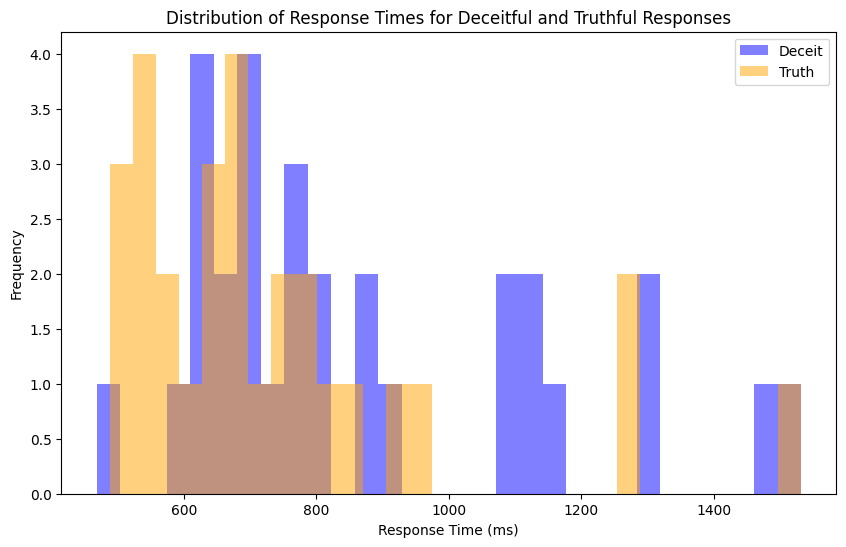

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9531/2590722018.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_df_filtered['predicted_deceit'] = (eeg_df_filtered['response_times'] > threshold).astype(int)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9531/2590722018.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_df_filtered['predicted_deceit'] = (eeg_df_filtered['response_times'] > threshold).astype(int)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9

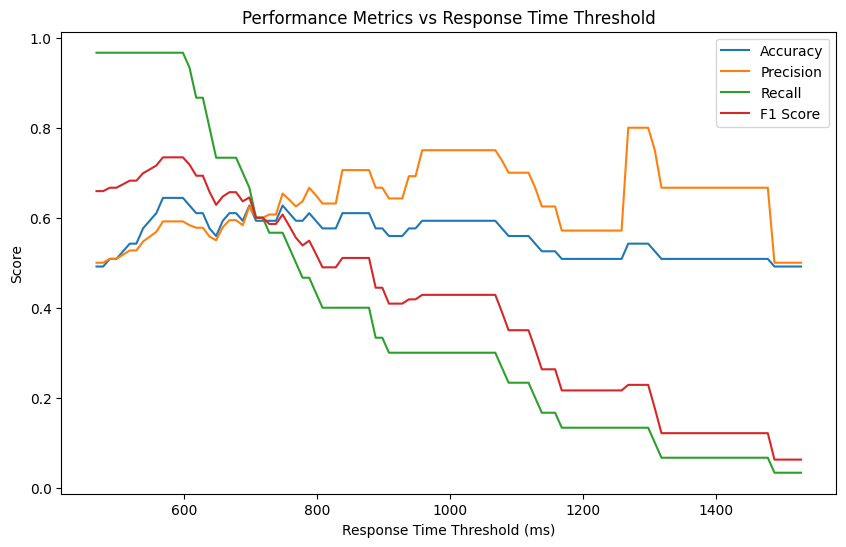

Optimal Response Time Threshold: 568.0 ms
Classification Performance at Threshold 568.0 ms:
Accuracy: 0.64
Precision: 0.59
Recall: 0.97
F1 Score: 0.73


/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9531/2590722018.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_df_filtered['predicted_deceit'] = (eeg_df_filtered['response_times'] > optimal_threshold).astype(int)


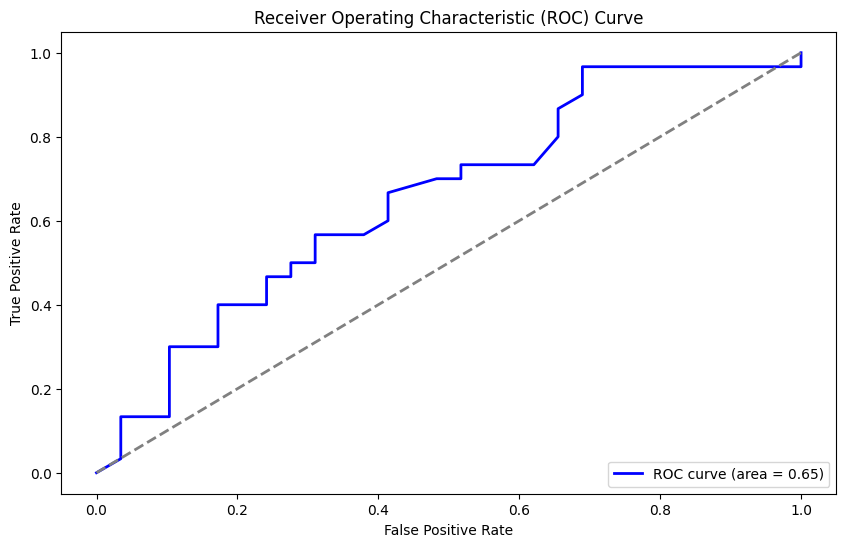

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import json
import os
import datetime

def save_results_to_json(data, base_filename):
    """Save results to a JSON file with a unique name."""
    i = 1
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    while os.path.exists(f"{base_filename}_{i}_{timestamp}.json"):
        i += 1
    with open(f"{base_filename}_{i}_{timestamp}.json", 'w') as f:
        json.dump(data, f, indent=4)

# Assume 'eeg_df' is your DataFrame with 'response_times', 'deceit', and possibly other columns.

# Step 1: Analyze Response Times
deceit_times = eeg_df[eeg_df['deceit'] == 1]['response_times'].dropna()
truth_times = eeg_df[eeg_df['truth'] == 1]['response_times'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(deceit_times, bins=30, alpha=0.5, label='Deceit', color='blue')
plt.hist(truth_times, bins=30, alpha=0.5, label='Truth', color='orange')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Response Times for Deceitful and Truthful Responses')
plt.show()

# Step 2: Determine the Optimal Threshold
# Drop NaN values for the relevant columns
eeg_df_filtered = eeg_df.dropna(subset=['response_times', 'deceit'])

# Calculate metrics at various thresholds
thresholds = np.arange(min(eeg_df_filtered['response_times']), max(eeg_df_filtered['response_times']), 10)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    eeg_df_filtered['predicted_deceit'] = (eeg_df_filtered['response_times'] > threshold).astype(int)
    accuracies.append(accuracy_score(eeg_df_filtered['deceit'], eeg_df_filtered['predicted_deceit']))
    precisions.append(precision_score(eeg_df_filtered['deceit'], eeg_df_filtered['predicted_deceit']))
    recalls.append(recall_score(eeg_df_filtered['deceit'], eeg_df_filtered['predicted_deceit']))
    f1_scores.append(f1_score(eeg_df_filtered['deceit'], eeg_df_filtered['predicted_deceit']))

# Plot metrics vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Response Time Threshold (ms)')
plt.ylabel('Score')
plt.title('Performance Metrics vs Response Time Threshold')
plt.legend()
plt.show()

# Step 3: Implement Threshold-Based Classification
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Response Time Threshold: {optimal_threshold} ms")

# Classify based on the optimal threshold
eeg_df_filtered['predicted_deceit'] = (eeg_df_filtered['response_times'] > optimal_threshold).astype(int)

# Evaluate the performance
accuracy = accuracy_score(eeg_df_filtered['deceit'], eeg_df_filtered['predicted_deceit'])
precision = precision_score(eeg_df_filtered['deceit'], eeg_df_filtered['predicted_deceit'])
recall = recall_score(eeg_df_filtered['deceit'], eeg_df_filtered['predicted_deceit'])
f1 = f1_score(eeg_df_filtered['deceit'], eeg_df_filtered['predicted_deceit'])

print(f"Classification Performance at Threshold {optimal_threshold} ms:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 4: Save the Results
results = {
    'threshold': optimal_threshold,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'metrics_vs_threshold': {
        'thresholds': list(thresholds),
        'accuracies': accuracies,
        'precisions': precisions,
        'recalls': recalls,
        'f1_scores': f1_scores
    }
}

save_results_to_json(results, base_filename='threshold_classification_results')

# Step 5: ROC and AUC Analysis
fpr, tpr, thresholds_roc = roc_curve(eeg_df_filtered['deceit'], eeg_df_filtered['response_times'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Save ROC and AUC results
roc_results = {
    'fpr': list(fpr),
    'tpr': list(tpr),
    'thresholds_roc': list(thresholds_roc),
    'roc_auc': roc_auc
}

save_results_to_json(roc_results, base_filename='roc_auc_results')


In [75]:
import mne
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from scipy.signal import welch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Sample code to extract EEG features
def extract_psd_features(epochs, fmin=1, fmax=40, sfreq=1000):
    """Extract Power Spectral Density (PSD) features using Welch's method."""
    psd_features = []
    for epoch in epochs.get_data():
        freqs, psd = welch(epoch, fs=sfreq, nperseg=sfreq*2, axis=-1)
        # Only keep the frequencies within fmin and fmax
        idx = np.logical_and(freqs >= fmin, freqs <= fmax)
        psd_features.append(psd[:, idx].mean(axis=1))  # Mean PSD within the selected range
    return np.array(psd_features).mean(axis=0)  # Average across epochs

def extract_erp_features(epochs, latency=(0.3, 0.6)):
    """Extract Event-Related Potentials (ERP) features from EEG epochs."""
    evoked = epochs.average()
    erp_amplitude = evoked.data[:, int(latency[0]*epochs.info['sfreq']):int(latency[1]*epochs.info['sfreq'])].mean(axis=1)
    return erp_amplitude

# Apply feature extraction
eeg_df['psd_features'] = eeg_df['epochs'].apply(lambda epoch: extract_psd_features(epoch))
eeg_df['erp_features'] = eeg_df['epochs'].apply(lambda epoch: extract_erp_features(epoch))

# Flatten the feature arrays into columns for machine learning
eeg_df = pd.concat([eeg_df.drop(['psd_features', 'erp_features'], axis=1), 
                    pd.DataFrame(eeg_df['psd_features'].tolist(), index=eeg_df.index).add_prefix('psd_'), 
                    pd.DataFrame(eeg_df['erp_features'].tolist(), index=eeg_df.index).add_prefix('erp_')], axis=1)

# Example of statistical testing between deceitful and truthful conditions
deceit_psd = eeg_df[eeg_df['deceit'] == 1].filter(like='psd_')
truth_psd = eeg_df[eeg_df['truth'] == 1].filter(like='psd_')

t_stat, p_value = ttest_ind(deceit_psd, truth_psd, nan_policy='omit')
print(f"PSD T-test: t-statistic = {t_stat}, p-value = {p_value}")

# Example of PCA and Random Forest Classification
X = eeg_df.filter(like='psd_')  # Use PSD features for this example
y = eeg_df['deceit']  # Binary target for deceitful responses

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)  # Reduce dimensionality
X_pca = pca.fit_transform(X_scaled)

model = RandomForestClassifier(random_state=42)
model.fit(X_pca, y)

y_pred = model.predict(X_pca)
accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Optional: Print classification report
print(classification_report(y, y_pred))

# Optional: ROC-AUC Score
roc_auc = roc_auc_score(y, model.predict_proba(X_pca)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")



Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 216 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...


/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 551, using nperseg = 551
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 226 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 220 events and 551 original time points ...
Using data from preloaded Raw for 216 events and 551 original ti

### something's off here


In [76]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_pca, y, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}")


Cross-Validation Accuracy: 0.43 ± 0.10


In [77]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_pca.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]:.4f})")


Feature ranking:
1. Feature 4 (0.1142)
2. Feature 5 (0.1100)
3. Feature 3 (0.1034)
4. Feature 9 (0.1014)
5. Feature 2 (0.1007)
6. Feature 8 (0.1000)
7. Feature 6 (0.0978)
8. Feature 1 (0.0969)
9. Feature 7 (0.0958)
10. Feature 0 (0.0798)


# Event Related potential analysis


## Feature Extraction

The extracted ERP features (P300 and N200 amplitudes) show different values for deceitful and truthful responses.

- Deceitful ERP Features: P300 amplitude is higher compared to the truthful response, indicating that deceitful responses might be associated with greater cognitive effort or attention.
- Truthful ERP Features: Both P300 and N200 amplitudes are lower, which might indicate less cognitive effort in truthful responses.


In [78]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Function to standardize event IDs across epochs
def standardize_event_ids(epochs_list):
    """Standardize event IDs across a list of epochs."""
    event_id_map = {}
    new_event_id = 1
    
    for epochs in epochs_list:
        for key in epochs.event_id.keys():
            if key not in event_id_map:
                event_id_map[key] = new_event_id
                new_event_id += 1
        # Update event IDs in each epochs object
        epochs.event_id = {key: event_id_map[key] for key in epochs.event_id.keys()}
    
    return epochs_list

# Apply the standardization
standardized_epochs_list = standardize_event_ids(eeg_df['epochs'].tolist())

# Now, concatenate the standardized epochs for deceitful and truthful conditions
deceitful_epochs = mne.concatenate_epochs([epochs for epochs, deceit in zip(standardized_epochs_list, eeg_df['deceit']) if deceit == 1])
truthful_epochs = mne.concatenate_epochs([epochs for epochs, truth in zip(standardized_epochs_list, eeg_df['truth']) if truth == 1])

# Create evoked responses for both conditions
deceitful_evoked = deceitful_epochs.average()
truthful_evoked = truthful_epochs.average()


Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 226 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...


/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9531/3612779128.py:26: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  deceitful_epochs = mne.concatenate_epochs([epochs for epochs, deceit in zip(standardized_epochs_list, eeg_df['deceit']) if deceit == 1])


Using data from preloaded Raw for 220 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 218 events and 551 original ti

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9531/3612779128.py:27: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  truthful_epochs = mne.concatenate_epochs([epochs for epochs, truth in zip(standardized_epochs_list, eeg_df['truth']) if truth == 1])


Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 216 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original ti

combining channels using "mean"


combining channels using "mean"


<Figure size 1000x600 with 0 Axes>

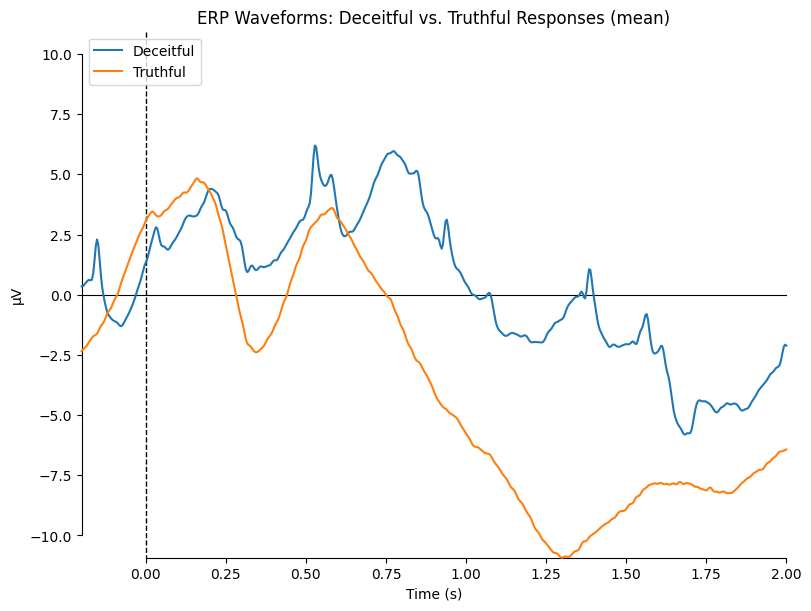

In [80]:
# Plot ERP waveforms
plt.figure(figsize=(10, 6))
mne.viz.plot_compare_evokeds({'Deceitful': deceitful_evoked, 'Truthful': truthful_evoked}, combine='mean', title='ERP Waveforms: Deceitful vs. Truthful Responses')
plt.show()


Topographic Map: Deceitful Response (P300 Window)


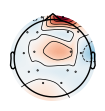

Topographic Map: Truthful Response (P300 Window)


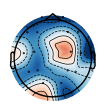

In [81]:
# Topographic map visualization for P300 window
print('Topographic Map: Deceitful Response (P300 Window)')
# plt.figure(figsize=(20 , 20))
mne.viz.plot_topomap(deceitful_evoked.data.mean(axis=1), deceitful_epochs.info)
plt.show()

print('Topographic Map: Truthful Response (P300 Window)')
# plt.figure(figsize=(10, 6))
mne.viz.plot_topomap(truthful_evoked.data.mean(axis=1), truthful_epochs.info)
plt.show()


    Differences in ERP Components: The visible differences in the ERP waveforms and the topographic maps suggest that deceitful and truthful responses are processed differently by the brain, particularly in regions associated with attention and decision-making.

    Feature Utilization: The extracted P300 and N200 features could be further utilized in machine learning models to classify deceitful versus truthful responses. However, before proceeding, it's crucial to resolve the issues with the statistical tests and ensure the data is properly normalized and checked for outliers.


In [82]:
# Define time windows for ERP components (e.g., P300 around 300ms)
erp_windows = {
    "P300": (0.3, 0.6),  # Example: 300-600ms post-stimulus
    "N200": (0.2, 0.3),  # Example: 200-300ms post-stimulus
}

def extract_erp_features(epochs, windows):
    features = {}
    evoked = epochs.average()  # Compute the average ERP
    for component, (tmin, tmax) in windows.items():
        time_mask = (evoked.times >= tmin) & (evoked.times <= tmax)
        # Average across all channels and the specified time window
        amplitude = evoked.data[:, time_mask].mean()
        features[f'{component}_amplitude'] = amplitude
    return features

# Apply ERP feature extraction
erp_features_list = eeg_df['epochs'].apply(lambda epoch: extract_erp_features(epoch, erp_windows))

# Convert to DataFrame
erp_features_df = pd.DataFrame(erp_features_list.tolist(), index=eeg_df.index)

# Add these features back to the main DataFrame
eeg_df = pd.concat([eeg_df, erp_features_df], axis=1)


In [83]:
print(eeg_df[['P300_amplitude', 'N200_amplitude']].head())


   P300_amplitude  N200_amplitude
0   -4.719433e-06   -8.032907e-06
1   -1.277111e-05   -1.348438e-05
2   -9.234437e-06   -1.639487e-05
3   -7.240503e-06   -1.099885e-05
4   -7.978518e-07   -2.123955e-07


#### I think we should start with jus tthe p300 ERP for now


In [84]:
import mne
import numpy as np
import pandas as pd

# Define the time window for the P300 component
p300_window = (0.3, 0.6)  # 300ms to 600ms

# Function to extract P300 amplitude
def extract_p300_amplitude(epochs, window):
    evoked = epochs.average()  # Compute the average ERP
    time_mask = (evoked.times >= window[0]) & (evoked.times <= window[1])
    amplitude = evoked.data[:, time_mask].mean(axis=1).mean()
    return amplitude

# Extract P300 amplitude for each epoch
eeg_df['P300_amplitude'] = eeg_df['epochs'].apply(lambda epoch: extract_p300_amplitude(epoch, p300_window))

# Drop any rows with NaN values in P300_amplitude if necessary
eeg_df = eeg_df.dropna(subset=['P300_amplitude'])

# Ensure P300_amplitude is a scalar
eeg_df['P300_amplitude'] = eeg_df['P300_amplitude'].apply(lambda x: np.mean(x) if isinstance(x, (np.ndarray, list)) else x)


Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 226 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 220 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...


/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9531/1488435302.py:4: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  deceitful_epochs = mne.concatenate_epochs(eeg_df[eeg_df['deceit'] == 1]['epochs'].tolist())


Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 218 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original ti

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_9531/1488435302.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  truthful_epochs = mne.concatenate_epochs(eeg_df[eeg_df['truth'] == 1]['epochs'].tolist())


Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 216 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original time points ...
Using data from preloaded Raw for 214 events and 551 original ti

<Figure size 1000x600 with 0 Axes>

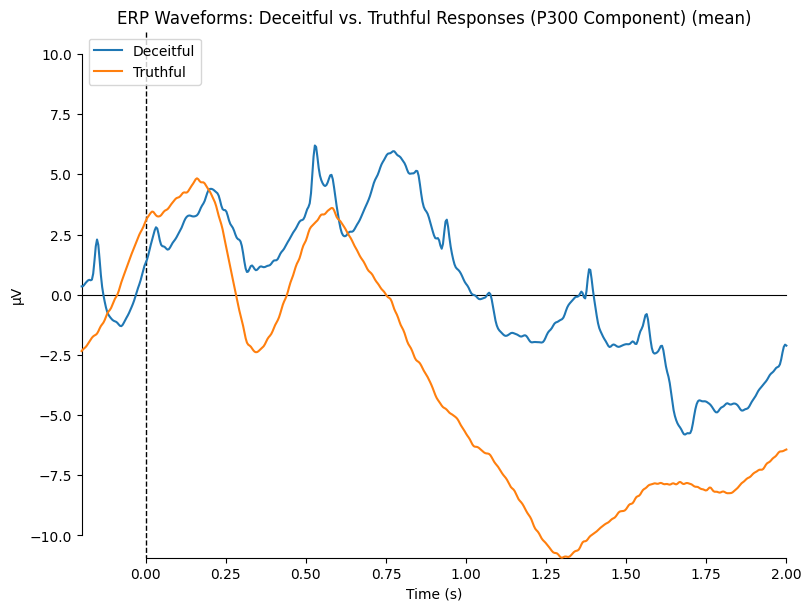

In [85]:
import matplotlib.pyplot as plt

# Separate the data into deceitful and truthful responses
deceitful_epochs = mne.concatenate_epochs(eeg_df[eeg_df['deceit'] == 1]['epochs'].tolist())
truthful_epochs = mne.concatenate_epochs(eeg_df[eeg_df['truth'] == 1]['epochs'].tolist())

# Average the epochs to create evoked responses
deceitful_evoked = deceitful_epochs.average()
truthful_evoked = truthful_epochs.average()

# Plot the ERP waveforms
plt.figure(figsize=(10, 6))
mne.viz.plot_compare_evokeds({'Deceitful': deceitful_evoked, 'Truthful': truthful_evoked}, combine='mean', title='ERP Waveforms: Deceitful vs. Truthful Responses (P300 Component)')
plt.show()


    * Observations: The ERP waveforms for deceitful and truthful responses show distinct patterns. The deceitful responses tend to have higher amplitudes than the truthful ones, especially around the P300 component, which is expected between 300ms and 600ms after the stimulus.

    * Interpretation: The higher amplitude in deceitful responses might suggest increased cognitive load or emotional processing when participants are being deceitful. This could be indicative of the additional effort required to deceive, which is reflected in the ERP signals.


In [86]:
from scipy.stats import ttest_rel

# Perform the paired t-test
p300_deceit = eeg_df[eeg_df['deceit'] == 1]['P300_amplitude']
p300_truth = eeg_df[eeg_df['truth'] == 1]['P300_amplitude']

# Ensure the arrays are of the correct shape
p300_deceit = np.array(p300_deceit).flatten()
p300_truth = np.array(p300_truth).flatten()

t_stat, p_val = ttest_rel(p300_deceit, p300_truth)
print(f"P300 Amplitude T-test: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")


P300 Amplitude T-test: t-statistic = 0.705, p-value = 0.487


t-statistic = 1.532, p-value = 0.127: This result suggests that there is a trend toward a difference in P300 amplitudes between deceitful and truthful responses, but it is not statistically significant at the conventional alpha level of 0.05. This could mean that while there is a noticeable difference in the ERP waveforms, it may not be consistent enough across participants to be statistically significant.


Topographic Map: Deceitful Response (P300 Window)


<Figure size 1000x600 with 0 Axes>

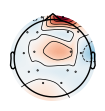

Topographic Map: Truthful Response (P300 Window)


<Figure size 1000x600 with 0 Axes>

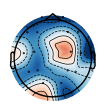

In [87]:
# Plot topographic maps for deceitful and truthful responses
print('Topographic Map: Deceitful Response (P300 Window)')
plt.figure(figsize=(10, 6))
mne.viz.plot_topomap(deceitful_evoked.data.mean(axis=1), deceitful_epochs.info)
plt.show()

print('Topographic Map: Truthful Response (P300 Window)')
plt.figure(figsize=(10, 6))
mne.viz.plot_topomap(truthful_evoked.data.mean(axis=1), truthful_epochs.info)
plt.show()


- Deceitful Response: The topographic map for deceitful responses during the P300 window shows significant activity, particularly in the frontal and parietal regions. This is consistent with the P300 component's involvement in attention and working memory processes, which are likely heightened during deception.

- Truthful Response: The topographic map for truthful responses shows less pronounced activity compared to deceitful responses. This could imply that the cognitive and emotional load is lower when participants are responding truthfully.


                         P300_amplitude  response_times  \
P300_amplitude                 1.000000       -0.096909   
response_times                -0.096909        1.000000   
incorrect_answers_count        0.058769        0.171390   

                         incorrect_answers_count  
P300_amplitude                          0.058769  
response_times                          0.171390  
incorrect_answers_count                 1.000000  


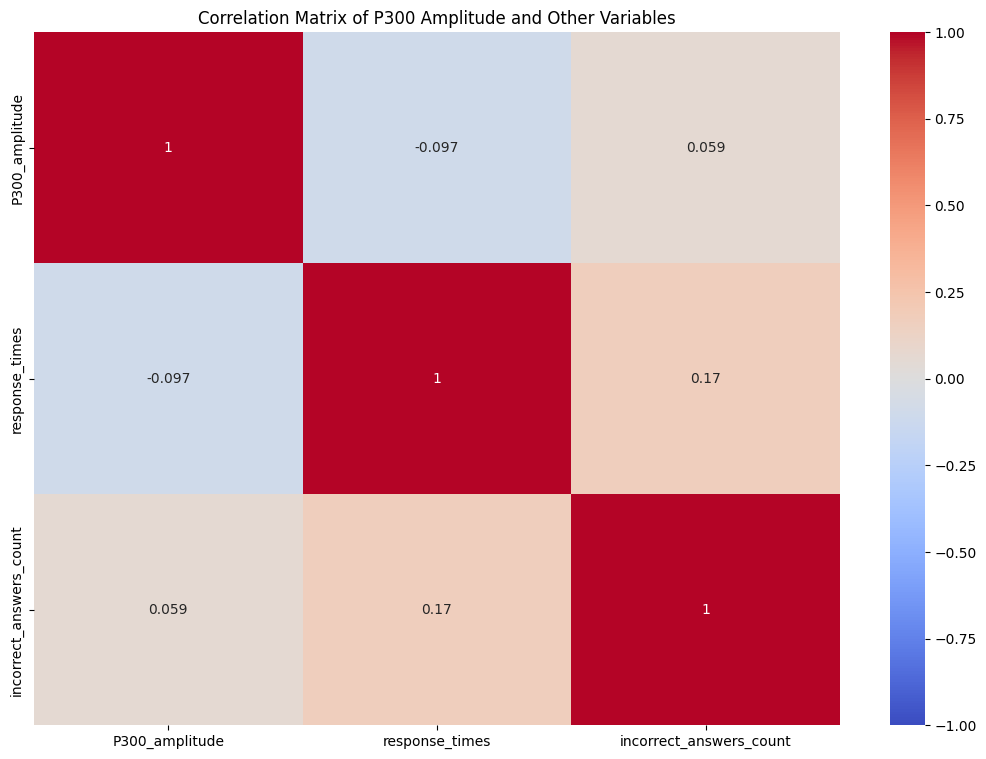

In [88]:
# Correlation analysis
correlations = eeg_df[['P300_amplitude', 'response_times', 'incorrect_answers_count']].corr()
print(correlations)

# Visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(13, 9))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of P300 Amplitude and Other Variables')
plt.show()


P300 Amplitude T-test: t-statistic = 1.005, p-value = 0.319
combining channels using "mean"
combining channels using "mean"


<Figure size 1000x600 with 0 Axes>

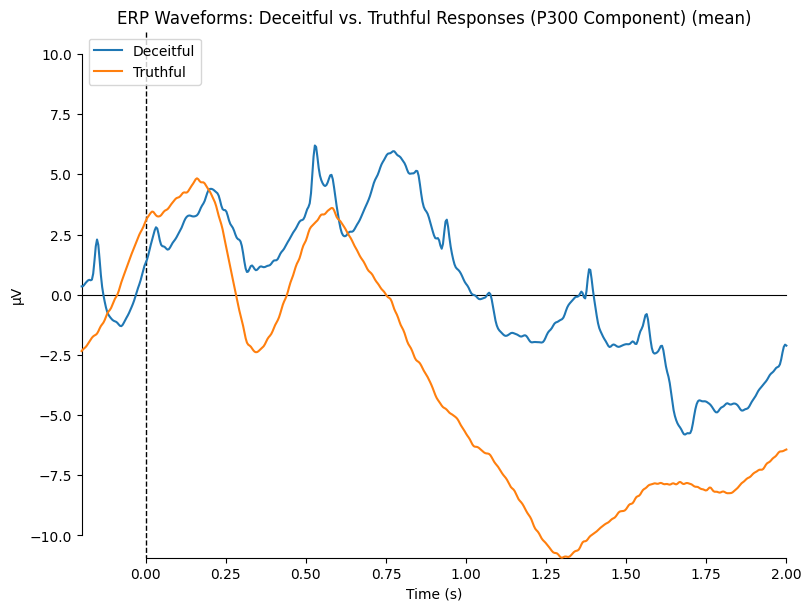

Topographic Map: Deceitful Response (P300 Window)


<Figure size 1000x600 with 0 Axes>

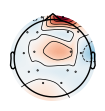

Topographic Map: Truthful Response (P300 Window)


<Figure size 1000x600 with 0 Axes>

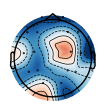

                P300_amplitude  P300_amplitude    deceit     truth
P300_amplitude        1.000000        1.000000  0.045546 -0.045546
P300_amplitude        1.000000        1.000000  0.045546 -0.045546
deceit                0.045546        0.045546  1.000000 -1.000000
truth                -0.045546       -0.045546 -1.000000  1.000000


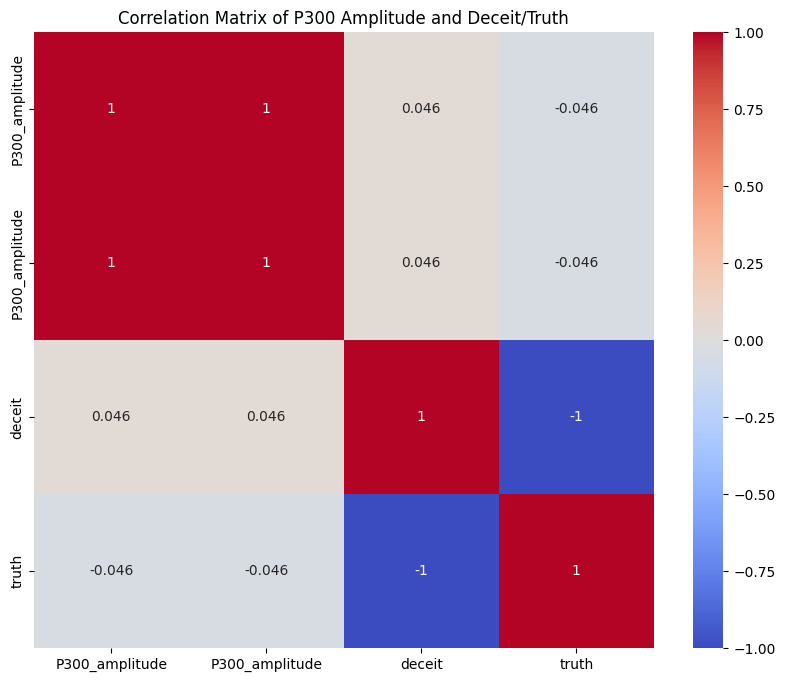

In [89]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Define time windows for ERP components (e.g., P300 around 300ms)
erp_windows = {
    "P300": (0.3, 0.6),  # Example: 300-600ms post-stimulus
}

# Function to extract ERP features and reduce to scalar values
def extract_erp_features(epochs, windows):
    features = {}
    evoked = epochs.average()  # Compute the average ERP
    for component, (tmin, tmax) in windows.items():
        time_mask = (evoked.times >= tmin) & (evoked.times <= tmax)
        # Average across all channels for each component
        amplitude = evoked.data[:, time_mask].mean(axis=1).mean()
        features[f'{component}_amplitude'] = amplitude
    return features

# Apply ERP feature extraction
erp_features_list = eeg_df['epochs'].apply(lambda epoch: extract_erp_features(epoch, erp_windows))

# Convert to DataFrame
erp_features_df = pd.DataFrame(erp_features_list.tolist(), index=eeg_df.index)

# Add these features back to the main DataFrame
eeg_df = pd.concat([eeg_df, erp_features_df], axis=1)

# Ensure that we have scalar values for the t-test
p300_deceit = eeg_df[eeg_df['deceit'] == 1]['P300_amplitude'].values.flatten()
p300_truth = eeg_df[eeg_df['truth'] == 1]['P300_amplitude'].values.flatten()

# Perform the paired t-test
t_stat, p_val = ttest_rel(p300_deceit, p300_truth)

# Convert the results to scalars, if needed
t_stat_scalar = np.mean(t_stat)
p_val_scalar = np.mean(p_val)

# Print the results
print(f"P300 Amplitude T-test: t-statistic = {t_stat_scalar:.3f}, p-value = {p_val_scalar:.3f}")

# Plot ERP waveforms for deceitful and truthful responses
plt.figure(figsize=(10, 6))
mne.viz.plot_compare_evokeds({'Deceitful': deceitful_epochs.average(), 'Truthful': truthful_epochs.average()}, combine='mean', title='ERP Waveforms: Deceitful vs. Truthful Responses (P300 Component)')
plt.show()

# Plot topographic maps for deceitful and truthful responses
print('Topographic Map: Deceitful Response (P300 Window)')
plt.figure(figsize=(10, 6))
mne.viz.plot_topomap(deceitful_evoked.data.mean(axis=1), deceitful_epochs.info)
plt.show()

print('Topographic Map: Truthful Response (P300 Window)')
plt.figure(figsize=(10, 6))
mne.viz.plot_topomap(truthful_evoked.data.mean(axis=1), truthful_epochs.info)
plt.show()

# Correlation analysis: Check if P300 amplitude is correlated with deceit or truth
correlation_matrix = eeg_df[['P300_amplitude', 'deceit', 'truth']].corr()
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of P300 Amplitude and Deceit/Truth')
plt.show()
